In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_all = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Attribute Descriptions

- **HeartDiseaseorAttack**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- **HighBP**: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional.
- **HighChol**: Have you EVER been told by a doctor, nurse, or other health professional that your blood cholesterol is high?
- **CholCheck**: Cholesterol check within the past five years.
- **BMI**: Body Mass Index (BMI).
- **Smoker**: Have you smoked at least 100 cigarettes in your entire life?  
  *[Note: 5 packs = 100 cigarettes]*.
- **Stroke**: (Ever told) you had a stroke.
- **Diabetes**: (Ever told) you have diabetes.
- **PhysActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- **Fruits**: Consume fruit 1 or more times per day.
- **Veggies**: Consume vegetables 1 or more times per day.
- **HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).
- **AnyHealthcare**: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
- **NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
- **GenHlth**: Would you say that in general your health is?
- **MentHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
- **PhysHlth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
- **DiffWalk**: Do you have serious difficulty walking or climbing stairs?
- **Sex**: Indicate sex of respondent.
- **Age**: Fourteen-level age category.
- **Education**: What is the highest grade or year of school you completed?
- **Income**: Is your annual household income from all sources?


In [5]:
df_all.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploratory Data Analysis

In [6]:
df_all.rename(columns = {'HeartDiseaseorAttack': 'Target'}, inplace = True)

In [7]:
X = df_all.drop('Target', axis = 1)
y = df_all['Target']

In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [9]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = [1, 2, 3, 4]

X = X.assign(BMI_bins = X.BMI.pipe(pd.cut, bins = bins, labels = labels))
X = X.astype({'HighBP':'uint8',
     'HighChol':'uint8',
     'CholCheck':'uint8',
     'BMI':'uint8',
     'Smoker':'uint8',
     'Stroke':'uint8',
     'Diabetes':'uint8',
     'PhysActivity':'uint8',
     'Fruits':'uint8',
     'Veggies':'uint8',
     'HvyAlcoholConsump':'uint8',
     'AnyHealthcare':'uint8',
     'NoDocbcCost':'uint8',
     'GenHlth':'uint8',
     'MentHlth':'uint8',
     'PhysHlth':'uint8',
     'DiffWalk':'uint8',
     'Sex':'uint8',
     'Age':'uint8',
     'Education':'uint8',
     'Income':'uint8',
     'BMI_bins':'uint8'})

In [10]:
y = y.astype({'Target': 'uint8'})

In [11]:
X.reset_index(drop = True)
y.reset_index(drop = True)

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    1
Name: Target, Length: 253680, dtype: uint8

In [12]:
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [13]:
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 
               'Smoker', 'PhysActivity', 'Fruits', 
               'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
               'NoDocbcCost', 'DiffWalk', 'Sex', 'Stroke']

ordinal_cols = [col for col in X.columns if (col not in binary_cols) & (col != 'Target')]

### EDA : Target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 9)

In [15]:
df = pd.concat([X_train, y_train], axis = 1)

Target
0    183830
1     19114
Name: count, dtype: int64
Target
0    90.581638%
1     9.418362%
Name: proportion, dtype: object


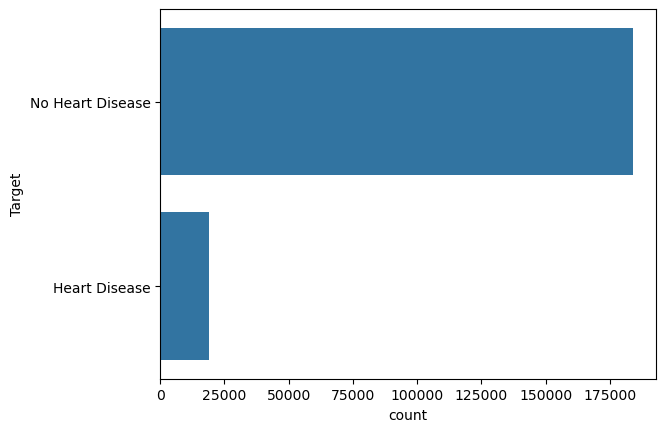

In [16]:
print(df['Target'].value_counts(ascending = False))
print(df['Target'].value_counts(1, ascending = False).apply(lambda x: format(x, '%')))
sns.countplot(y = 'Target', data = df)
plt.yticks(ticks = [0, 1], labels = ['No Heart Disease', 'Heart Disease'])
plt.show()

### EDA: Categorical Variables

In [17]:
(df.groupby('Target')['HighBP'].value_counts().unstack())
# .iloc[:, ::-1])

HighBP,0,1
Target,,
0,110959,72871
1,4763,14351


In [18]:
def analyse_cat(var):
    (df.groupby('Target')[var]
     .value_counts(1)
     .unstack()
     .iloc[:, ::-1]
     .plot(kind = 'barh', stacked = True, figsize = (10, 2), alpha = 1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['No Heart Disease', 'Heart Disease'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

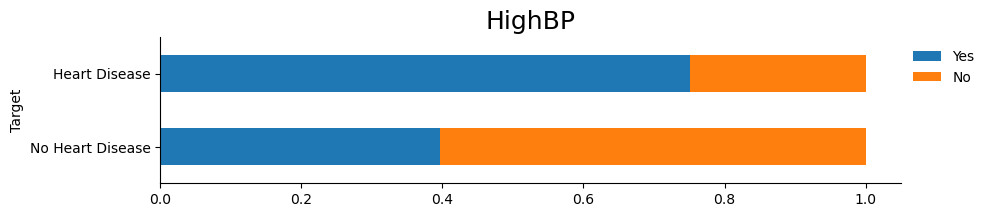

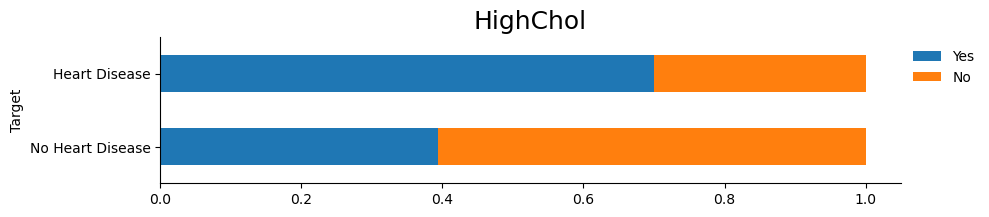

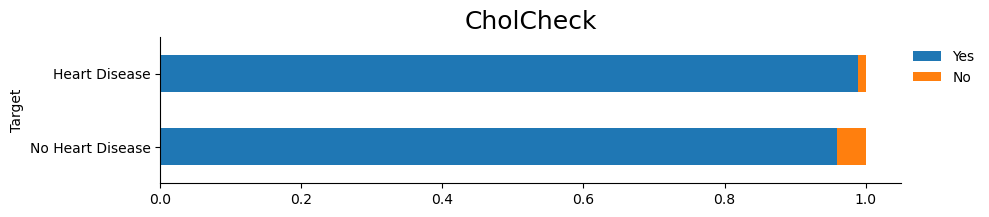

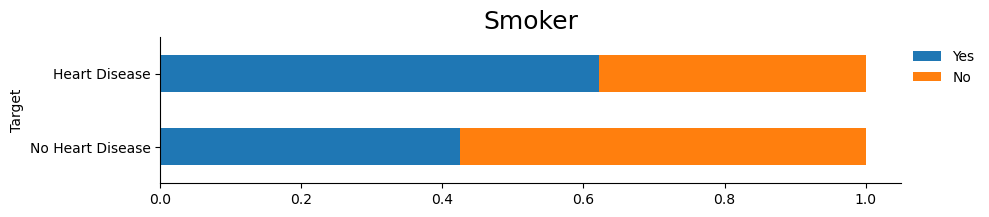

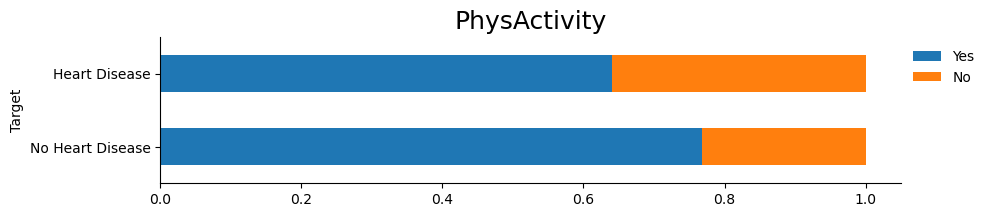

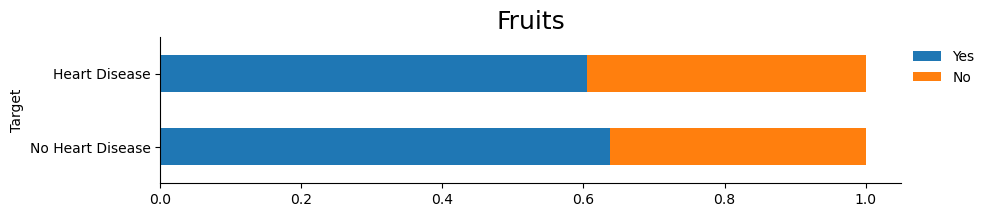

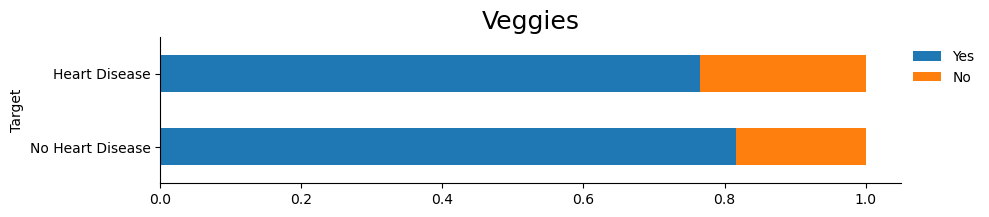

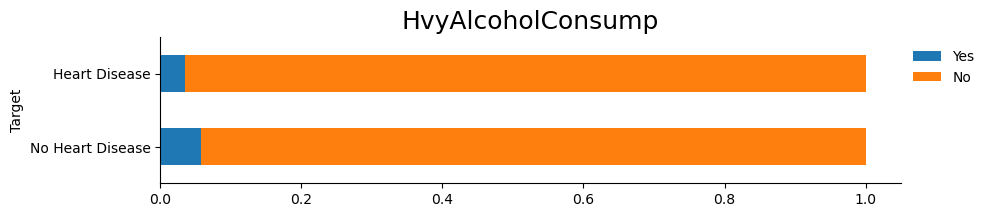

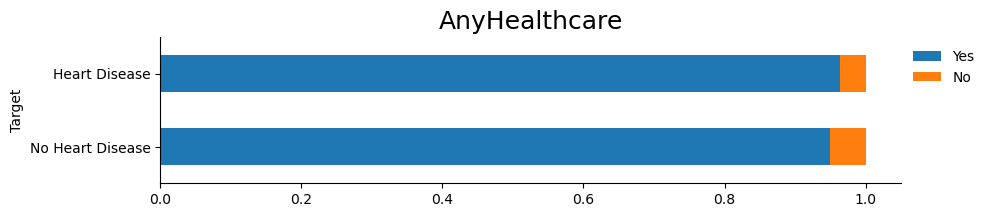

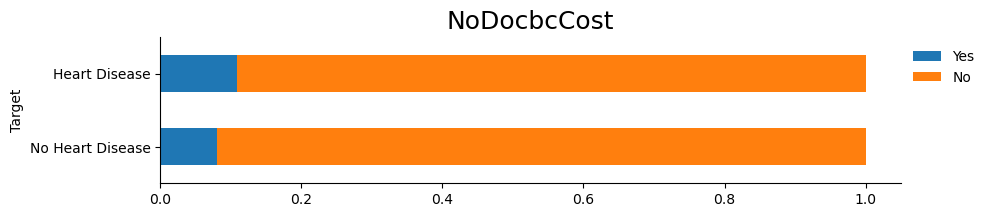

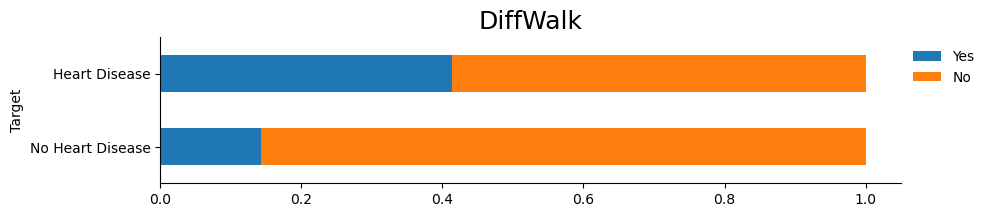

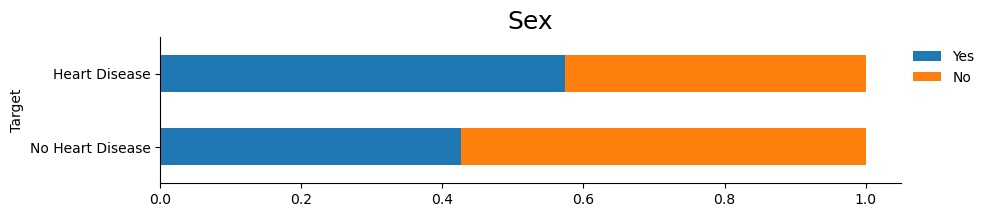

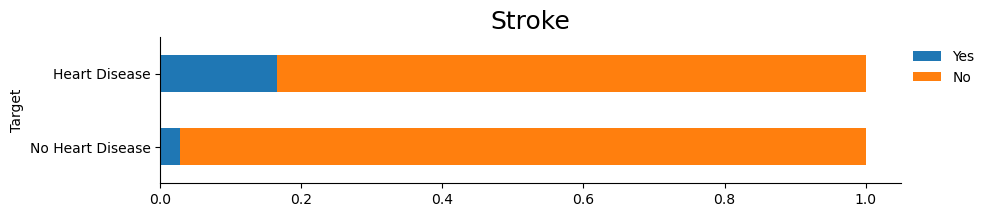

In [19]:
for var in binary_cols:
    analyse_cat(var)

BP, Cholestrol, Smoking, Diffficulty Walking, stroke, and sex(to some extent) seem to be related to the person having heart disease

In [20]:
df[ordinal_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,202944.0,28.381214,6.616742,12.0,24.0,27.0,31.0,98.0
Diabetes,202944.0,0.296900,0.698212,0.0,0.0,0.0,0.0,2.0
GenHlth,202944.0,2.512476,1.068334,1.0,2.0,2.0,3.0,5.0
MentHlth,202944.0,3.189343,7.420099,0.0,0.0,0.0,2.0,30.0
PhysHlth,202944.0,4.247246,8.718306,0.0,0.0,0.0,3.0,30.0
Age,202944.0,8.033438,3.058457,1.0,6.0,8.0,10.0,13.0
Education,202944.0,5.049718,0.985920,1.0,4.0,5.0,6.0,6.0
Income,202944.0,6.051413,2.070680,1.0,5.0,7.0,8.0,8.0
BMI_bins,202944.0,3.049462,0.815507,1.0,2.0,3.0,4.0,4.0


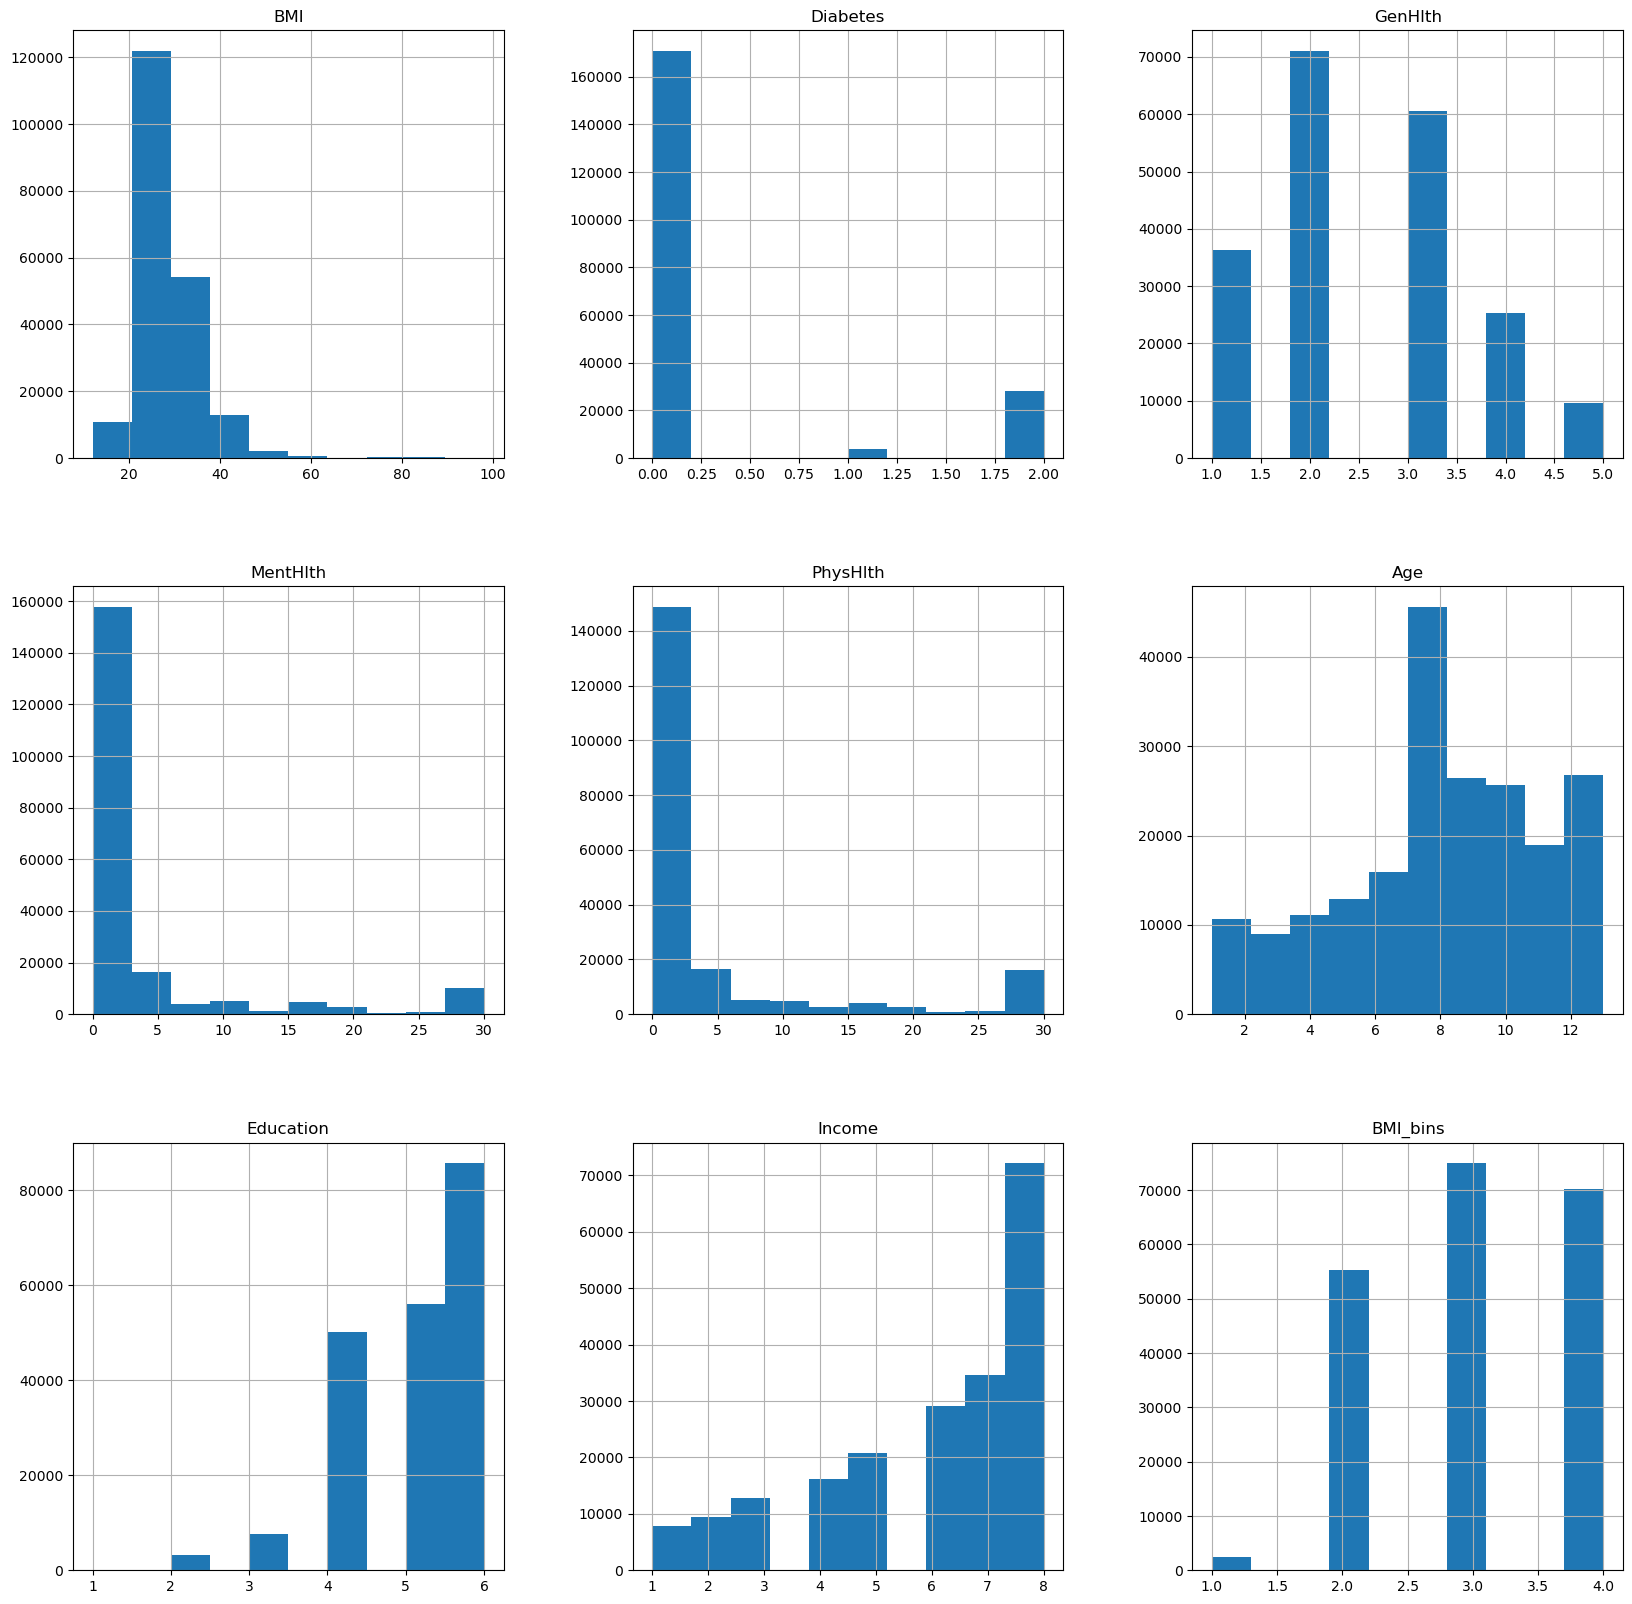

In [21]:
df[ordinal_cols].hist(figsize = (20, 20))
plt.show()

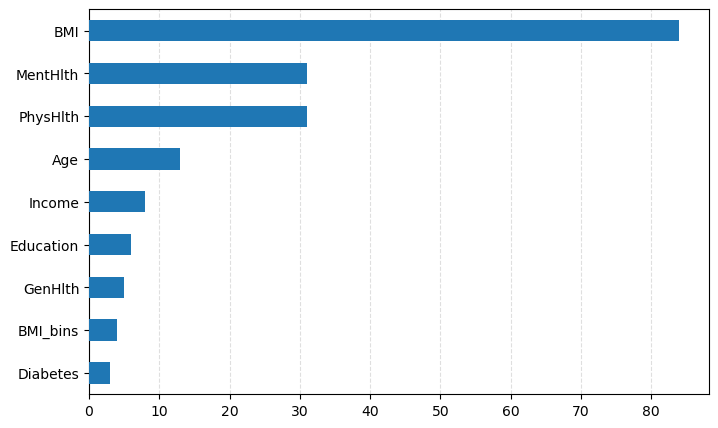

In [22]:
### Number of unique values


(df[ordinal_cols]
 .nunique()
 .sort_values(ascending = True)
 .plot(kind = 'barh', figsize = (8, 5), zorder = 3))

plt.grid(axis = 'x', linestyle = '--', alpha = 0.4)

BMI seems to be more of a continuous variable while mental health and physical health seem to be related to days of the month

### Correlation

<Axes: >

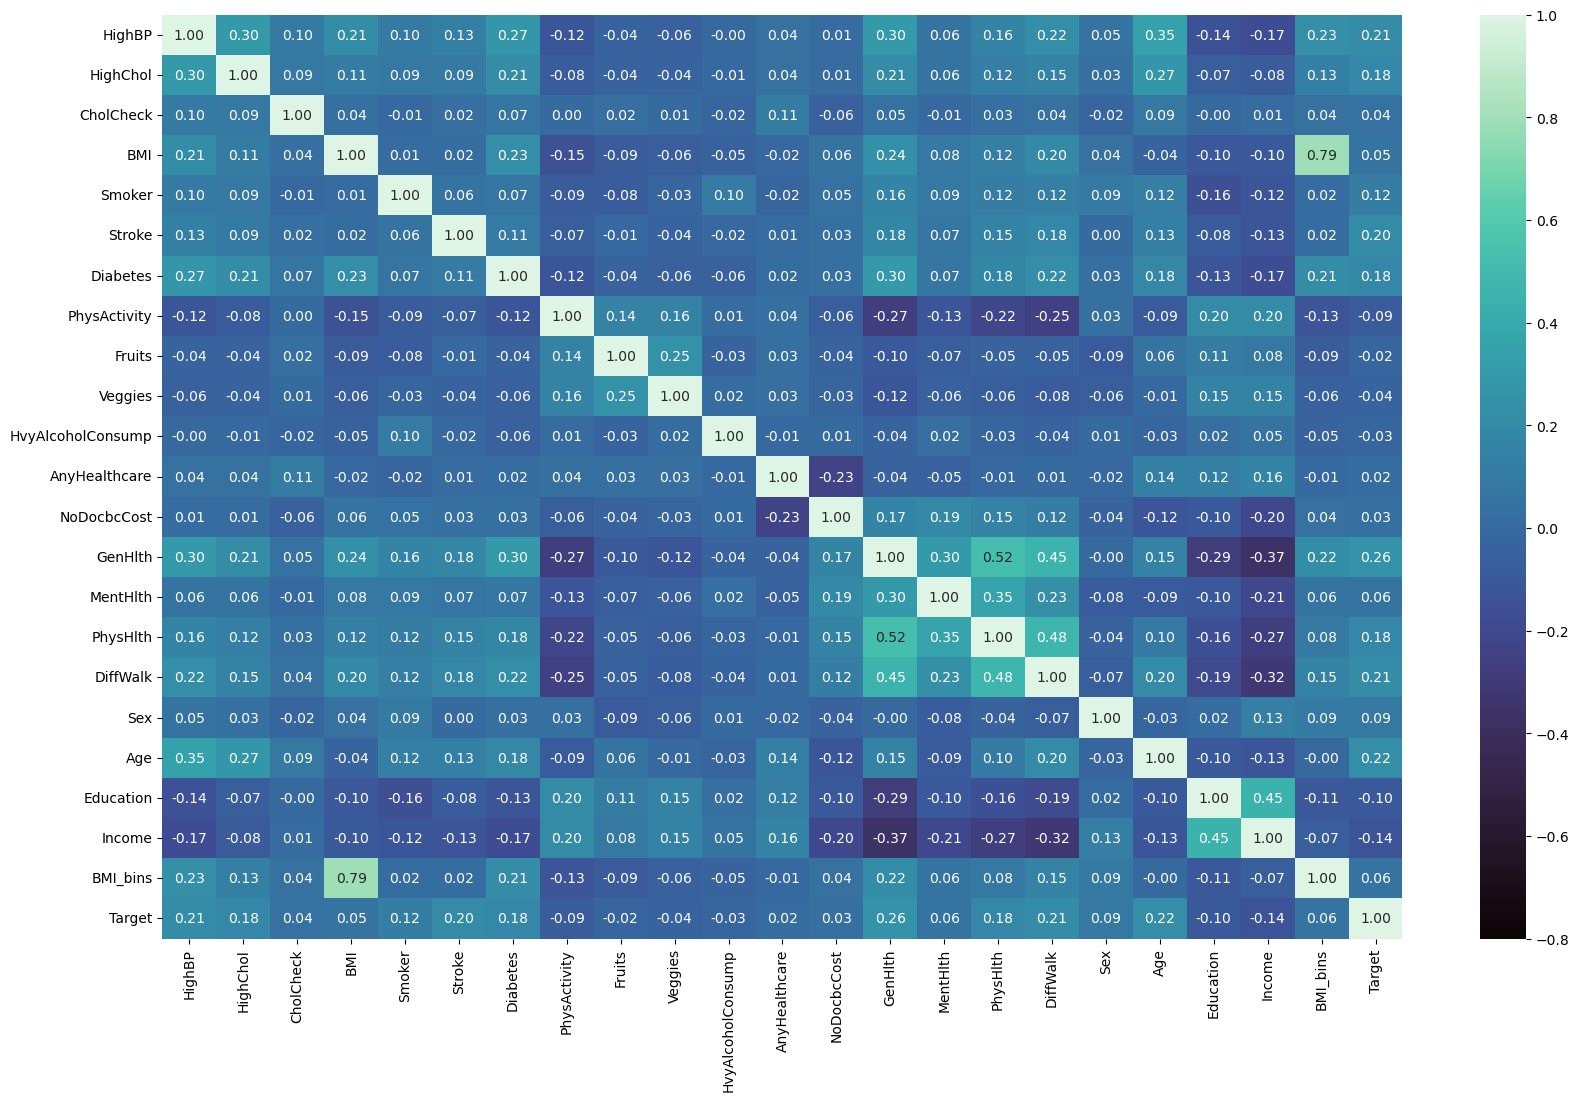

In [23]:
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), cmap = 'mako', fmt = '.2f', annot = True, vmin = -0.8)

Physical and General health are positively correlated (r = 0.52) \
Income and General health are negatively correlated (r = -0.37)

### Correlations with target variable

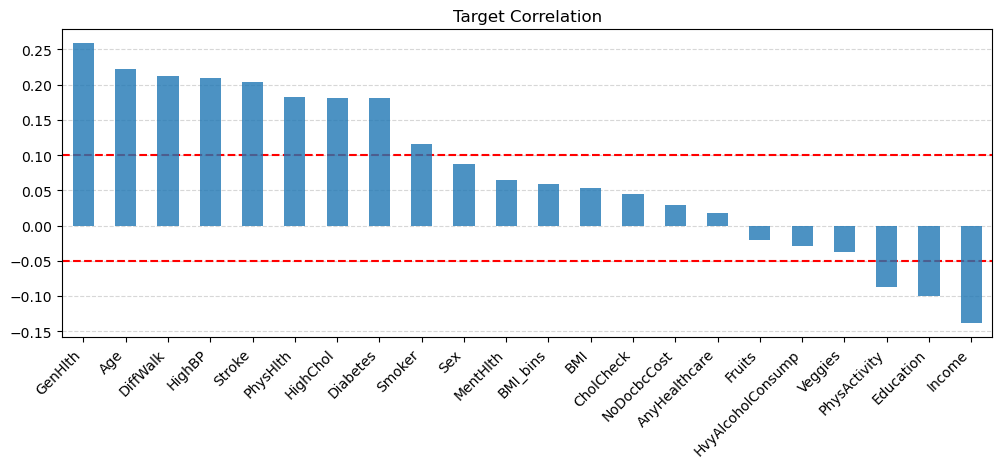

In [24]:
(df.drop('Target', axis = 1)
.corrwith(df.Target)
.sort_values(ascending  = False)
.plot(kind = 'bar', figsize = (12, 4), title = 'Target Correlation', alpha = 0.8, zorder = 3))

plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0.1, color = 'red', linestyle = '--')
plt.axhline(y = -0.05, color = 'red', linestyle = '--')
plt.show()

**Correlated Variables**: 
- GenHlth 
- Age 
- DiffWalk 
- High BP 
- Stroke
- PhysHlth
- HighChol
- Diabetes
- Smoker
- PhysActivity
- Education
- Income 

**Very Weakly Correlated Variables**: 
- Sex
- MentHlth
- BMI_bins
- BMI
- CholCheck
- NoDobcCost
- AnyHealthcare
- Fruits
- HvyAlcoholConsump
- Veggies

#### GenHlth

1 = Excellent and 5 = Poor

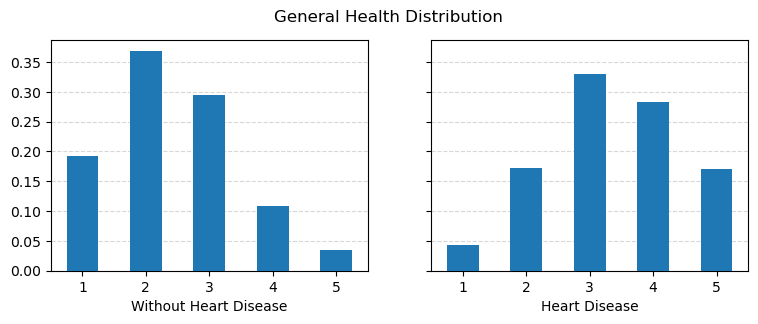

In [25]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('General Health Distribution')

(df[df['Target'] == 0]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)


Individuals with heart disease perceived a significantly lower level of well-being compared to those without heart disease

#### HighBP

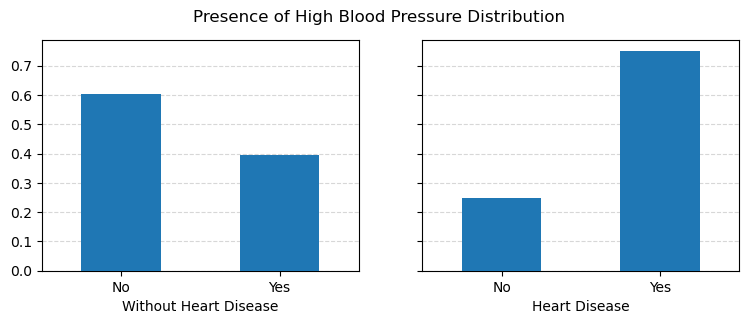

In [26]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('Presence of High Blood Pressure Distribution')

(df[df['Target'] == 0]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Individuals without heart disease had a lower incidence of high blood pressure compared to indivdiuals with heart disease

#### DiffWalk

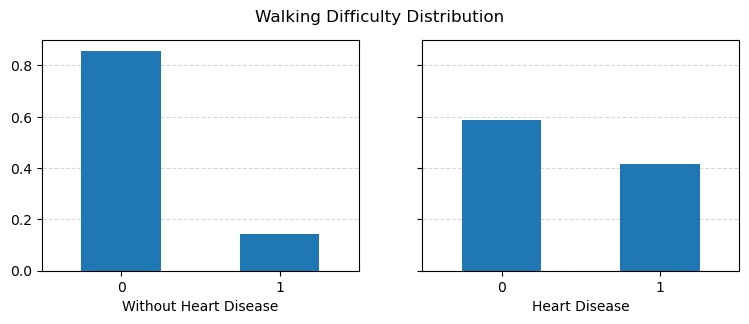

In [27]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('Walking Difficulty Distribution')

(df[df['Target'] == 0]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Individuals without heart disease had a lower chance of having difficulties walking than patients with heart disease

#### BMI

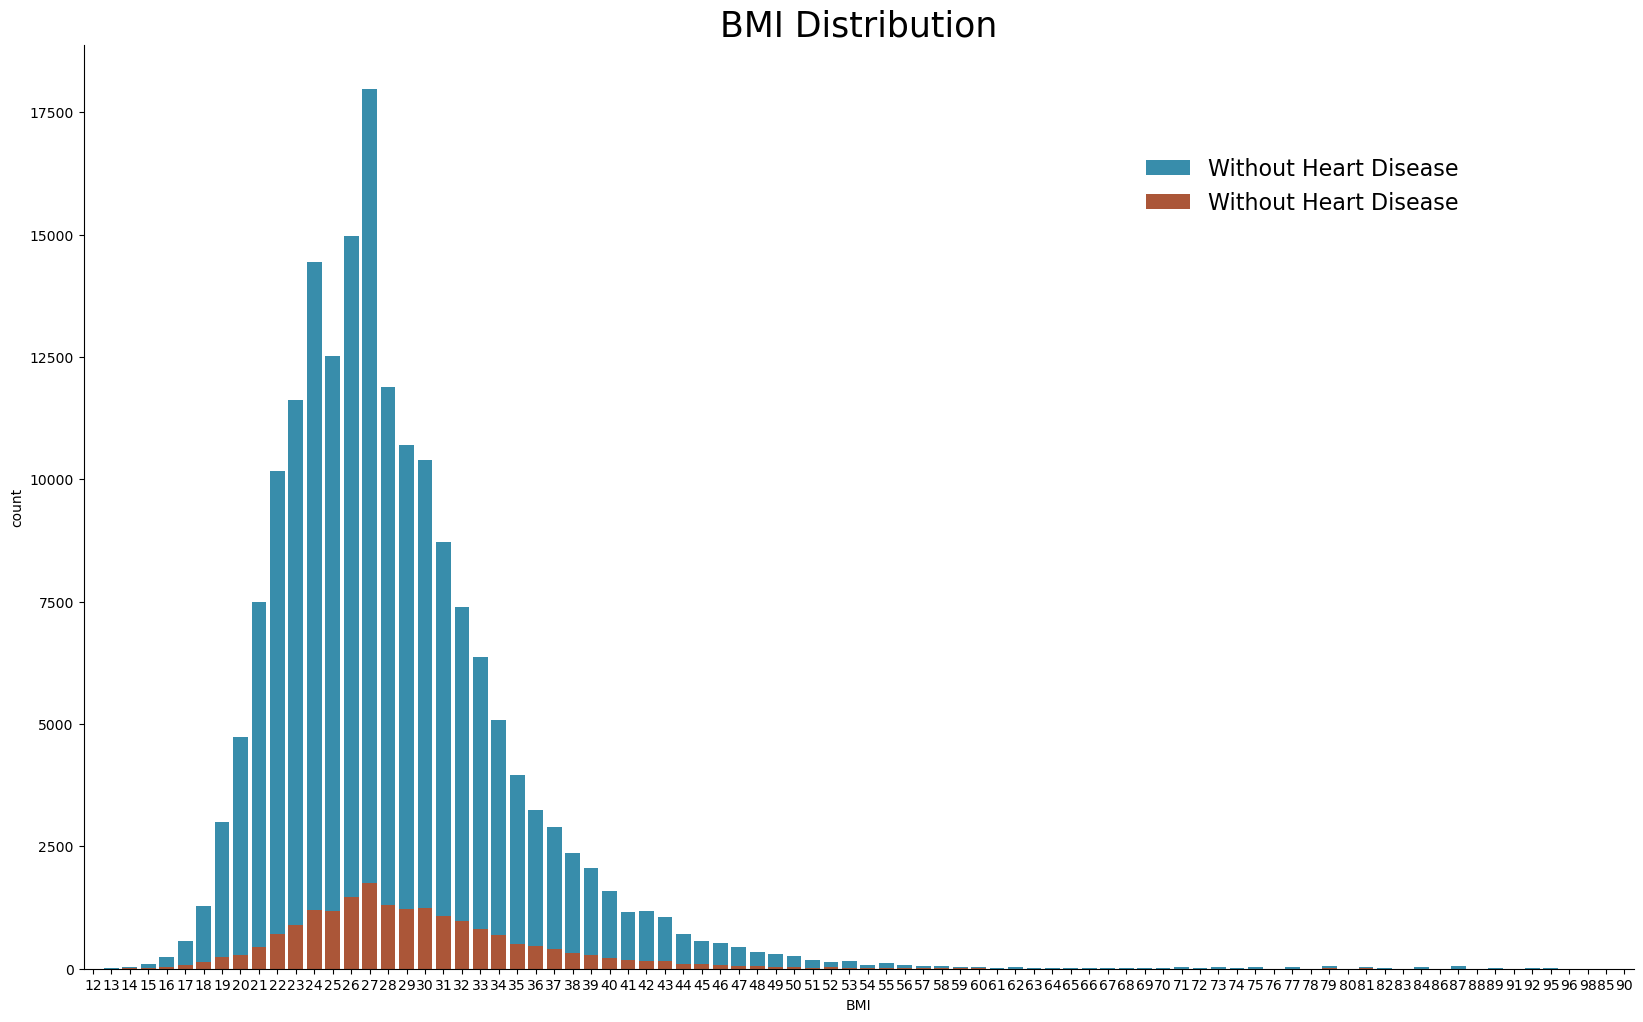

In [28]:
plt.figure(figsize = (20, 12))

colors = ['#be4d25','#2596be']
sns.countplot(x = (df[df['Target'] == 0]['BMI']), color = colors[1], label = 'Without Heart Disease')
sns.countplot(x = (df[df['Target'] == 1]['BMI']), color = colors[0], label = 'Without Heart Disease')
sns.despine()
plt.title('BMI Distribution', size = 25)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0),shadow=False, frameon=False, prop={'size':16});

#### BMI Bins

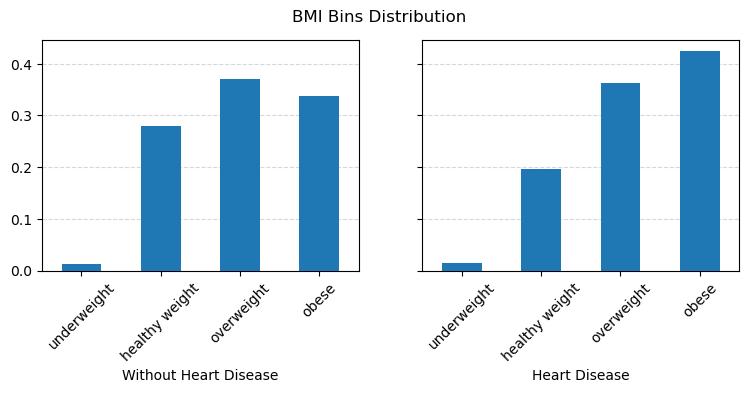

In [29]:
labels = ['underweight', 'healthy weight', 'overweight', 'obese']

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('BMI Bins Distribution')

(df[df['Target'] == 0]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(labels)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(labels)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Obese people have a higher chance of having heart disease

#### HighChol

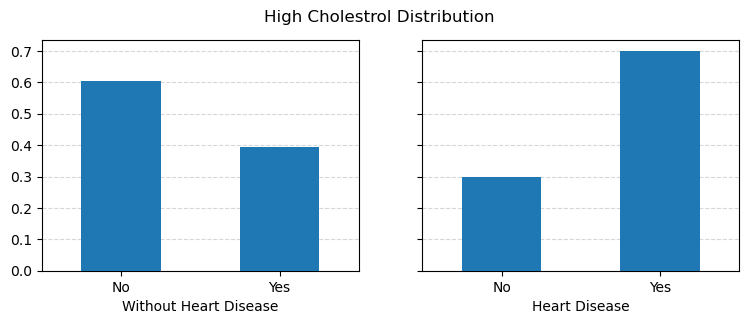

In [30]:

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('High Cholestrol Distribution')

(df[df['Target'] == 0]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Having high cholestrol significantly increases the chances of having heart disease

#### Age

- 1 = 18-24 years old
- 2 = 25-29 years old
- 3 = 30-34 years old
- 4 = 35-39 years old
- 5 = 40-44 years old
- 6 = 45-49 years old
- 7 = 50-54 years old
- 8 = 55-59 years old
- 9 = 60-64 years old
- 10 = 65-69 years old
- 11 = 70-74 years old
- 12 = 75-79 years old
- 13 = 80 years and older

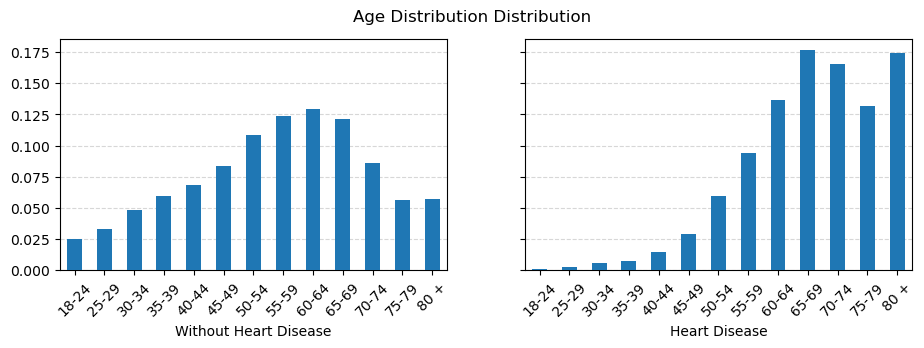

In [31]:
age_groups = ['18-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54', 
              '55-59', '60-64', '65-69', '70-74', 
              '75-79', '80 +']

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (11, 3), sharey = True)
fig.suptitle('Age Distribution Distribution')

(df[df['Target'] == 0]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(age_groups)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(age_groups)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

People of higher ages have a higher chance of having heart disease

#### Diabetes

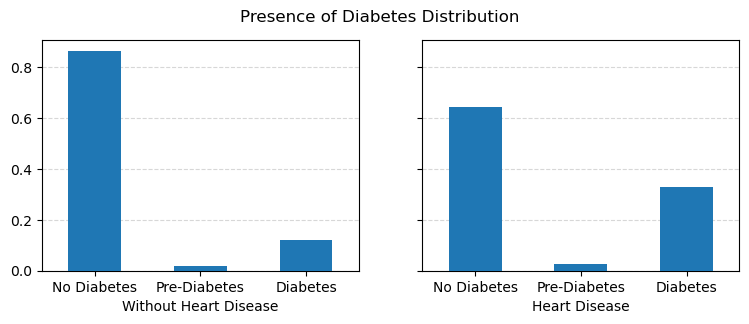

In [32]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('Presence of Diabetes Distribution')

(df[df['Target'] == 0]['Diabetes']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No Diabetes", 'Pre-Diabetes', 'Diabetes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Diabetes']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No Diabetes", 'Pre-Diabetes', 'Diabetes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Having diabetes increases the chances of having heart disease

#### PhysHlth

Lower = Better Physical Health

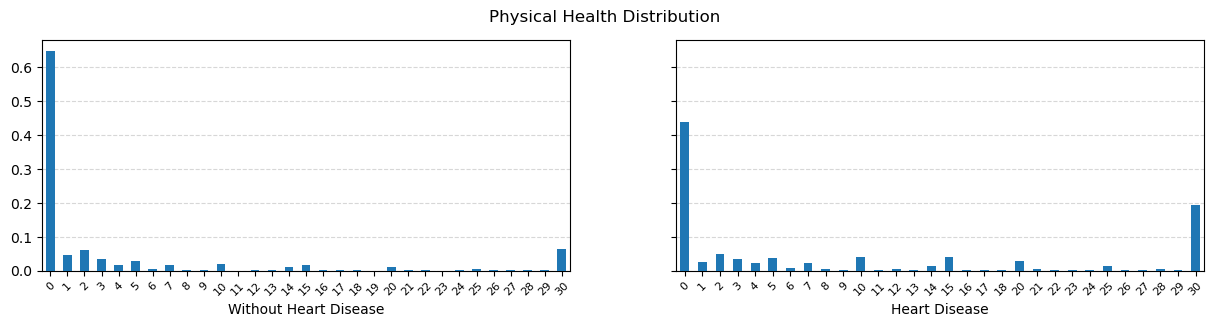

In [33]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Physical Health Distribution')

(df[df['Target'] == 0]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

People with heart disease exhibit illnesses on more number of days than people without heart disease

#### Income

- 1 = <10,000
- 2 = 10,000–15,000
- 3 = 15,000–20,000
- 4 = 20,000–25,000
- 5 = 25,000–35,000
- 6 = 35,000–50,000
- 7 = 50,001–75,000
- 8 = >75,000

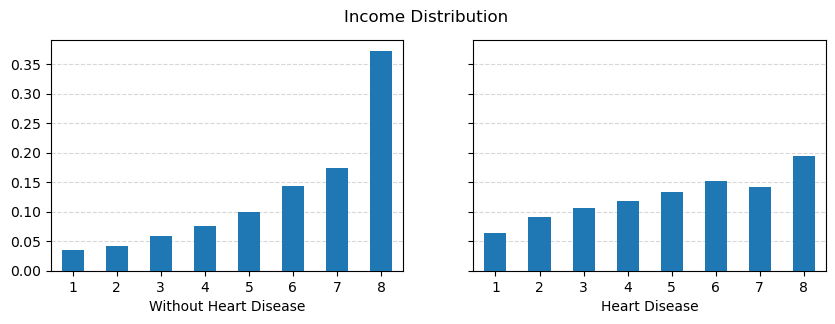

In [34]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharey = True)
fig.suptitle('Income Distribution')

(df[df['Target'] == 0]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

People with heart disease have a stronger presence in lower income tiers than people with heart disease

#### Education

- 1 = Never attended school or only kindergarten
- 2 = Grades 1 through 8 (Elementary)
- 3 = Grades 9 through 11 (Some high school)
- 4 = Grade 12 or GED (High school graduate)
- 5 = College 1 year to 3 years (Some college or technical school)
- 6 = College 4 years or more (College graduate)

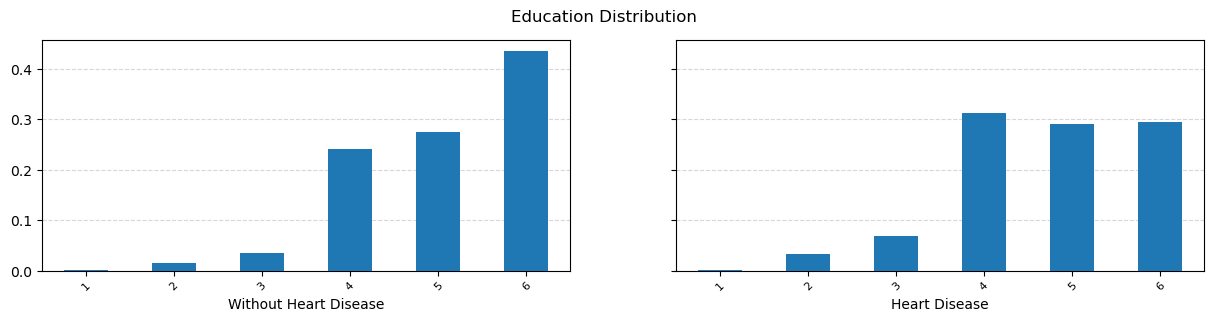

In [35]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Education Distribution')

(df[df['Target'] == 0]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Fewer individuals with college degrees get diagnosed with heart diseases

#### PhysActivity

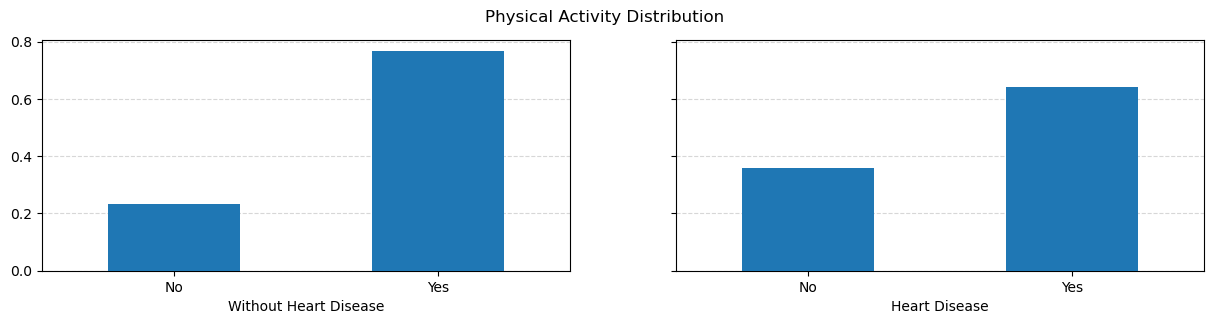

In [36]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Physical Activity Distribution')

(df[df['Target'] == 0]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

There are more individuals diagnosed with heart disease who report lower levels of physical activity

#### Smoker

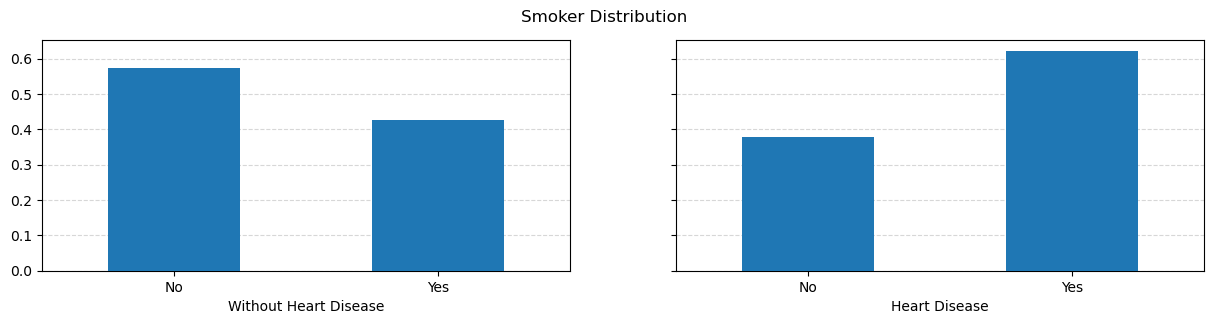

In [37]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Smoker Distribution')

(df[df['Target'] == 0]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

More people with heart disease are smokers

#### Stroke

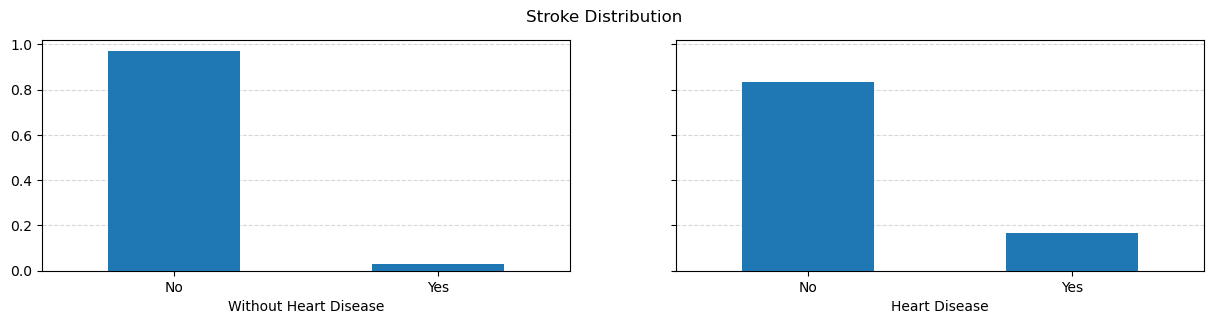

In [38]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Stroke Distribution')

(df[df['Target'] == 0]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Not a very strong association but slightly higher number of people with heart disease had a stroke 

#### Alcohol Consumption

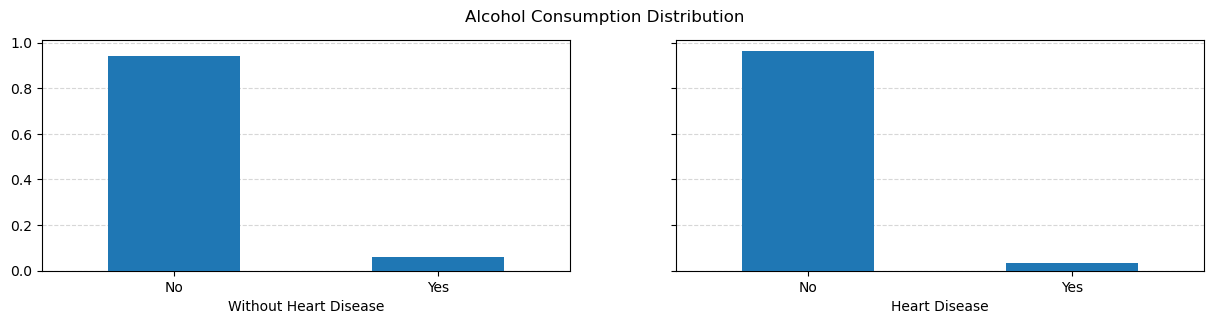

In [39]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Alcohol Consumption Distribution')

(df[df['Target'] == 0]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

No strong association observed

#### Cholestrol Check

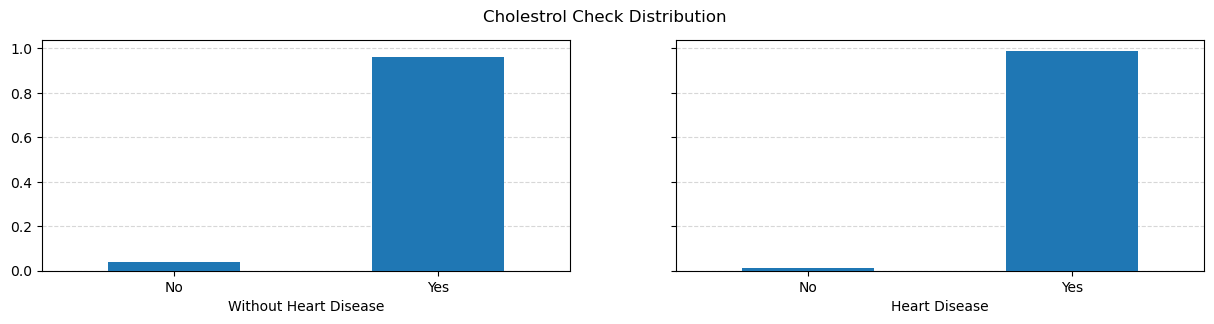

In [40]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Cholestrol Check Distribution')

(df[df['Target'] == 0]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

No strong association observed

## Feature Selection

#### Pearson Correlation

In [41]:
pear = (df.drop('Target', axis = 1)
        .corrwith(df.Target)
        .abs()
        .sort_values(ascending = False))
pear

GenHlth              0.258555
Age                  0.222372
DiffWalk             0.212209
HighBP               0.209105
Stroke               0.203323
PhysHlth             0.183156
HighChol             0.181041
Diabetes             0.180490
Income               0.138833
Smoker               0.115821
Education            0.100396
Sex                  0.086893
PhysActivity         0.086775
MentHlth             0.064442
BMI_bins             0.059176
BMI                  0.052964
CholCheck            0.044732
Veggies              0.037913
NoDocbcCost          0.029857
HvyAlcoholConsump    0.028675
Fruits               0.019900
AnyHealthcare        0.018156
dtype: float64

In [42]:
pear[pear>0.05]

GenHlth         0.258555
Age             0.222372
DiffWalk        0.212209
HighBP          0.209105
Stroke          0.203323
PhysHlth        0.183156
HighChol        0.181041
Diabetes        0.180490
Income          0.138833
Smoker          0.115821
Education       0.100396
Sex             0.086893
PhysActivity    0.086775
MentHlth        0.064442
BMI_bins        0.059176
BMI             0.052964
dtype: float64

#### Chi2 Test

In [43]:
df_X = df.drop('Target', axis = 1)
df_y = df['Target']

In [44]:
chi = chi2(df_X, df_y)
chisquare_df = pd.DataFrame(chi).T.set_index(df_X.columns).rename(columns = {0: 'Chi2 Score', 1: 'p-value'})
chi2_list = chisquare_df.sort_values(by = 'Chi2 Score', ascending = False)
chi2_list

,Chi2 Score,p-value
PhysHlth,121834.702830,0.000000e+00
MentHlth,14548.769404,0.000000e+00
Age,11685.231985,0.000000e+00
Diabetes,10855.424192,0.000000e+00
Stroke,8044.988721,0.000000e+00
DiffWalk,7603.480837,0.000000e+00
GenHlth,6162.979880,0.000000e+00
HighBP,5059.942966,0.000000e+00
HighChol,3837.021131,0.000000e+00
Income,2771.576723,0.000000e+00


#### Mutual Information

In [45]:
mut_info = mutual_info_classif(df_X, df_y)
mut_df = pd.DataFrame(mut_info, columns = ['Mutual Info'], index = df_X.columns)
mut_df.sort_values(by = 'Mutual Info', ascending = False)

,Mutual Info
AnyHealthcare,0.044300
CholCheck,0.042145
PhysActivity,0.041255
GenHlth,0.039949
HighBP,0.039905
Fruits,0.035157
Veggies,0.034597
HighChol,0.034542
Age,0.031675
Smoker,0.027179


In [46]:
chi2_list[chi2_list['Chi2 Score'] > 250].index.to_list()

['PhysHlth',
 'MentHlth',
 'Age',
 'Diabetes',
 'Stroke',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'HighChol',
 'Income',
 'Smoker',
 'BMI',
 'Sex',
 'Education',
 'PhysActivity']

## Preprocessing

In [47]:
df2 = pd.concat([X_test, y_test], axis = 1)

In [58]:
def drop_duplicates_reset_index(df):
    dataframe = df.copy()
    dataframe = dataframe.drop_duplicates().reset_index(drop = True)
    return dataframe

selected_cols = ['PhysHlth','MentHlth','Age',
 'Diabetes','Stroke','DiffWalk','GenHlth',
 'HighBP','HighChol','Income','Smoker',
 'BMI','Sex','Education','PhysActivity']


df_clean = drop_duplicates_reset_index(df)
df2_clean = drop_duplicates_reset_index(df2)

X_train = df_clean[selected_cols]
y_train = df_clean['Target']

X_test = df2_clean[selected_cols]
y_test = df2_clean['Target']


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## Model Preparation

#### Without Balancing

In [59]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
xgb_clf = XGBClassifier()
knn_clf = KNeighborsClassifier()
gauss_nb_clf = GaussianNB()
log_clf = LogisticRegression()

In [61]:
def classifiers_test(clf_names, clf_list, X_tr, X_test, y_tr, y_test):
    
    info_clf = []
    for count, clf in enumerate(clf_list):
        clf.fit(X_tr, y_tr)

        y_pred = clf.predict(X_tr)
        y_pred_proba = clf.predict_proba(X_tr)[:, 1]
        acc_score_train = accuracy_score(y_tr, y_pred)
        auc_score_train = roc_auc_score(y_tr, y_pred_proba)
        f1_score_train = f1_score(y_tr, y_pred)
        recall_train = recall_score(y_tr, y_pred)

        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        acc_score_test = accuracy_score(y_test, y_pred)
        auc_score_test = roc_auc_score(y_test, y_pred_proba)
        f1_score_test = f1_score(y_test, y_pred)
        recall_test = recall_score(y_test, y_pred)

        info_clf.append([clf_names[count], acc_score_train, auc_score_train, f1_score_train, recall_train, acc_score_test, auc_score_test, f1_score_test, recall_test])
    info_df = pd.DataFrame(info_clf, columns = ['Model', 'Train Accuracy', 'Train AUC', 'Train F1', 'Train Recall', 'Test Accuracy', 'Test AUC', 'Test F1', 'Test Recall'])

    return info_df

In [54]:
clf_names = ['RandomForest', 'DecisionTree', 'XGBoost', 'KNeighbors', 'GaussianNB', 'LogisticRegression']
clf_list = [forest, tree, xgb_clf, knn_clf, gauss_nb_clf, log_clf]

In [90]:
imbalanced_res = classifiers_test(clf_names, clf_list, X_train_scaled, X_test_scaled, y_train, y_test)
imbalanced_res

,Model,Train Accuracy,Train AUC,Train F1,Test Accuracy,Test AUC,Test F1
0,RandomForest,0.992481,0.998728,0.958875,0.900288,0.806853,0.184690
1,DecisionTree,0.992495,0.999581,0.958633,0.855625,0.594820,0.257476
2,XGBoost,0.913828,0.874649,0.254243,0.906674,0.843378,0.171479
3,KNeighbors,0.919613,0.927726,0.402899,0.897272,0.724217,0.226247
4,GaussianNB,0.833309,0.816241,0.361825,0.834851,0.817070,0.363830
5,LogisticRegression,0.907822,0.846950,0.207633,0.907088,0.845058,0.193085
6,GradientBoosting,0.908591,0.851775,0.193400,0.908034,0.848060,0.180829


#### Balancing with Random Undersampling

In [53]:
from imblearn.under_sampling import RandomUnderSampler

In [89]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)

undersample_res = classifiers_test(clf_names, clf_list, X_train_rus, X_test_scaled, y_train_rus, y_test)
undersample_res

,Model,Train Accuracy,Train AUC,Train F1,Test Accuracy,Test AUC,Test F1
0,RandomForest,0.992257,0.999669,0.992255,0.728891,0.822857,0.352371
1,DecisionTree,0.992257,0.999877,0.992211,0.687382,0.677402,0.284929
2,XGBoost,0.813514,0.898727,0.819450,0.737228,0.837516,0.361617
3,KNeighbors,0.813592,0.900890,0.817768,0.718898,0.792960,0.336034
4,GaussianNB,0.720074,0.816036,0.698759,0.779052,0.817465,0.355006
5,LogisticRegression,0.770639,0.847264,0.775628,0.755026,0.845343,0.378021
6,GradientBoosting,0.775531,0.854001,0.784608,0.742274,0.847686,0.371467


#### Balancing with Random Oversampling

In [62]:
from imblearn.over_sampling import RandomOverSampler

In [92]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

oversample_res = classifiers_test(clf_names, clf_list, X_train_ros, X_test_scaled, y_train_ros, y_test)
oversample_res

,Model,Train Accuracy,Train AUC,Train F1,Test Accuracy,Test AUC,Test F1
0,RandomForest,0.991299,0.999588,0.991354,0.881544,0.801246,0.269567
1,DecisionTree,0.991299,0.999606,0.991351,0.851328,0.581168,0.239847
2,XGBoost,0.801069,0.880847,0.810082,0.753587,0.839389,0.371317
3,KNeighbors,0.924577,0.990819,0.928357,0.799354,0.716773,0.327787
4,GaussianNB,0.719736,0.815891,0.698077,0.779052,0.817148,0.354783
5,LogisticRegression,0.770250,0.846830,0.775378,0.754218,0.845319,0.377496
6,GradientBoosting,0.774593,0.851785,0.783891,0.741998,0.848118,0.371519


#### Balancing with SMOTE Oversampling

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smot = SMOTE()
X_train_smot, y_train_smot = smot.fit_resample(X_train_scaled, y_train)



In [ ]:
smot_res = classifiers_test(clf_names, clf_list, X_train_smot, X_test_scaled, y_train_smot, y_test)

In [56]:
smot_res

,Model,Train Accuracy,Train AUC,Train F1,Train Recall,Test Accuracy,Test AUC,Test F1,Test Recall
0,RandomForest,0.995441,0.999781,0.995438,0.994582,0.888462,0.809649,0.285028,0.236033
1,DecisionTree,0.995447,0.999950,0.995434,0.992667,0.851644,0.592841,0.252755,0.266374
2,XGBoost,0.944922,0.984310,0.942471,0.902317,0.905018,0.839588,0.208053,0.132454
3,KNeighbors,0.916058,0.987817,0.920982,0.978371,0.782758,0.739505,0.328664,0.564553
4,GaussianNB,0.726783,0.821528,0.707582,0.661122,0.781201,0.820308,0.359915,0.653065
5,LogisticRegression,0.775456,0.851686,0.781299,0.802176,0.755401,0.844527,0.376758,0.784892


#### Model Training Results:
After exploring the performance of all models in undersampling and oversampling methods, the best performance was seen for Logistic Regression using SMOTE

In [65]:
best_feature_list = chi2_list.index.to_list()
best_feature_list.remove('BMI_bins')
best_feature_list

['PhysHlth',
 'MentHlth',
 'Age',
 'Diabetes',
 'Stroke',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'HighChol',
 'Income',
 'Smoker',
 'BMI',
 'Sex',
 'Education',
 'PhysActivity',
 'NoDocbcCost',
 'HvyAlcoholConsump',
 'Veggies',
 'Fruits',
 'CholCheck',
 'AnyHealthcare']

In [66]:
X_train_smot, X_val_smot, y_train_smot, y_val_smot = train_test_split(X_train_smot, y_train_smot, stratify = y_train_smot, test_size = 0.2)

In [70]:
from sklearn.feature_selection import RFE


rfe_auc_list = []


for k in range(1, 22):
    RFE_selector = RFE(estimator = log_clf, n_features_to_select = k, step = 1)
    RFE_selector.fit(X_train_smot, y_train_smot)
    sel_x_t = RFE_selector.transform(X_train_smot)
    sel_x_val = RFE_selector.transform(X_val_smot)

    log_clf.fit(sel_x_t, y_train_smot)
    log_clf_preds_proba = log_clf.predict_proba(sel_x_val)[:, 1]
    log_clf_preds = log_clf.predict(sel_x_val)

    log_clf_recall = round(recall_score(y_val_smot, log_clf_preds), 4)
    log_clf_f1 = round(f1_score(y_val_smot, log_clf_preds), 4)

    rfe_auc_list.append([log_clf_recall, log_clf_f1])

In [73]:
pd.DataFrame(rfe_auc_list, columns = ['Recall', 'F1 Score'])

,Recall,F1 Score
0,0.7107,0.6996
1,0.7766,0.7499
2,0.7656,0.7550
3,0.7764,0.7650
4,0.7952,0.7750
5,0.8025,0.7774
6,0.8006,0.7797
7,0.8033,0.7811
8,0.8045,0.7822
9,0.8051,0.7828


In [74]:
RFE_selector = RFE(estimator = log_clf, n_features_to_select = 15, step = 6)
RFE_selector.fit(X_train_smot, y_train_smot)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_smot.columns[selected_features_mask]
selected_features

Index(['PhysHlth', 'MentHlth', 'Age', 'Diabetes', 'Stroke', 'DiffWalk',
       'GenHlth', 'HighBP', 'HighChol', 'Income', 'Smoker', 'BMI', 'Sex',
       'Education', 'PhysActivity'],
      dtype='object')

RFE Feature Selection matches with the feature selection done using filter methods (Chi2 Score and Pearson Correlation)

In [60]:
selected_cols

['PhysHlth',
 'MentHlth',
 'Age',
 'Diabetes',
 'Stroke',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'HighChol',
 'Income',
 'Smoker',
 'BMI',
 'Sex',
 'Education',
 'PhysActivity']

### Hyperparameter Tuning

In [61]:
X_train_smot, y_train_smot = smot.fit_resample(X_train_scaled, y_train)


In [64]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [50, 100, 200, 500],
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(
    estimator = log_reg,
    param_grid = param_grid,
    scoring = 'recall',
    cv = 4, 
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_smot, y_train_smot)

print("Best parameters:", grid_search.best_params_)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Best parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [63]:
from sklearn.model_selection import cross_val_score

In [65]:
log_tuned = LogisticRegression(**grid_search.best_params_)

cross_val_score(log_tuned, X_train_smot, y_train_smot, scoring = 'recall', cv = 10, n_jobs = -1)

array([0.78825858, 0.7985728 , 0.80235068, 0.80751934, 0.80560053,
       0.79684596, 0.79773327, 0.79863277, 0.7989326 , 0.80121132])

In [66]:
log_tuned.fit(X_train_smot, y_train_smot)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay

TEST SET RESULTS:
Recall Score: 0.7836024323757601
F1 Score: 0.37927534760986503
Accuracy: 0.7488347261863206
AUC ROC: 0.8394468222272332
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     43932
           1       0.25      0.78      0.38      4769

    accuracy                           0.75     48701
   macro avg       0.61      0.76      0.61     48701
weighted avg       0.90      0.75      0.80     48701



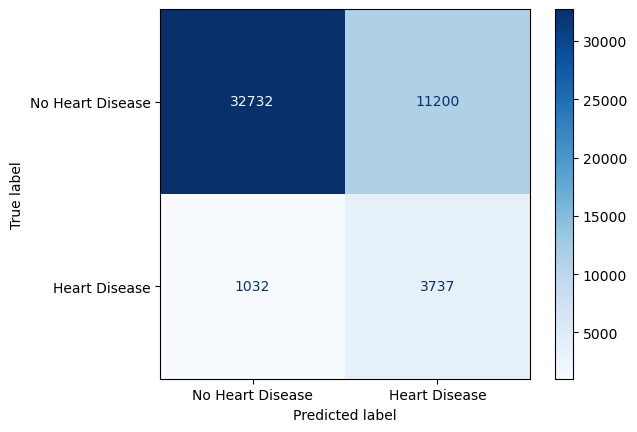

In [115]:
y_preds = log_tuned.predict(X_test_scaled)
y_preds_proba = log_tuned.predict_proba(X_test_scaled)[:, 1]

print('TEST SET RESULTS:')
print('Recall Score:', recall_score(y_test, y_preds))
print('F1 Score:', f1_score(y_test, y_preds))
print('Accuracy:', accuracy_score(y_test, y_preds))
print('AUC ROC:', roc_auc_score(y_test, y_preds_proba))
print(classification_report(y_test, y_preds))
cf = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(cf, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap = 'Blues')
plt.show()

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_all = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Attribute Descriptions

- **HeartDiseaseorAttack**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- **HighBP**: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional.
- **HighChol**: Have you EVER been told by a doctor, nurse, or other health professional that your blood cholesterol is high?
- **CholCheck**: Cholesterol check within the past five years.
- **BMI**: Body Mass Index (BMI).
- **Smoker**: Have you smoked at least 100 cigarettes in your entire life?  
  *[Note: 5 packs = 100 cigarettes]*.
- **Stroke**: (Ever told) you had a stroke.
- **Diabetes**: (Ever told) you have diabetes.
- **PhysActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- **Fruits**: Consume fruit 1 or more times per day.
- **Veggies**: Consume vegetables 1 or more times per day.
- **HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).
- **AnyHealthcare**: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
- **NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
- **GenHlth**: Would you say that in general your health is?
- **MentHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
- **PhysHlth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
- **DiffWalk**: Do you have serious difficulty walking or climbing stairs?
- **Sex**: Indicate sex of respondent.
- **Age**: Fourteen-level age category.
- **Education**: What is the highest grade or year of school you completed?
- **Income**: Is your annual household income from all sources?


In [ ]:
df_all.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploratory Data Analysis

In [ ]:
df_all.rename(columns = {'HeartDiseaseorAttack': 'Target'}, inplace = True)

In [ ]:
X = df_all.drop('Target', axis = 1)
y = df_all['Target']

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [ ]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = [1, 2, 3, 4]

X = X.assign(BMI_bins = X.BMI.pipe(pd.cut, bins = bins, labels = labels))
X = X.astype({'HighBP':'uint8',
     'HighChol':'uint8',
     'CholCheck':'uint8',
     'BMI':'uint8',
     'Smoker':'uint8',
     'Stroke':'uint8',
     'Diabetes':'uint8',
     'PhysActivity':'uint8',
     'Fruits':'uint8',
     'Veggies':'uint8',
     'HvyAlcoholConsump':'uint8',
     'AnyHealthcare':'uint8',
     'NoDocbcCost':'uint8',
     'GenHlth':'uint8',
     'MentHlth':'uint8',
     'PhysHlth':'uint8',
     'DiffWalk':'uint8',
     'Sex':'uint8',
     'Age':'uint8',
     'Education':'uint8',
     'Income':'uint8',
     'BMI_bins':'uint8'})

In [ ]:
y = y.astype({'Target': 'uint8'})

In [ ]:
X.reset_index(drop = True)
y.reset_index(drop = True)

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    1
Name: Target, Length: 253680, dtype: uint8

In [ ]:
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [ ]:
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 
               'Smoker', 'PhysActivity', 'Fruits', 
               'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
               'NoDocbcCost', 'DiffWalk', 'Sex', 'Stroke']

ordinal_cols = [col for col in X.columns if (col not in binary_cols) & (col != 'Target')]

### EDA : Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 9)

In [ ]:
df = pd.concat([X_train, y_train], axis = 1)

Target
0    183830
1     19114
Name: count, dtype: int64
Target
0    90.581638%
1     9.418362%
Name: proportion, dtype: object


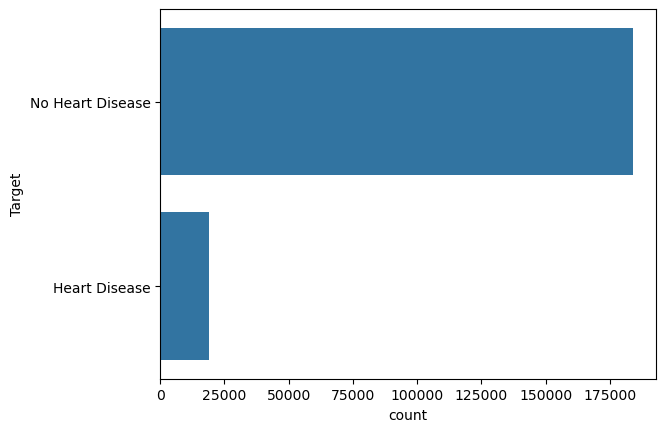

In [ ]:
print(df['Target'].value_counts(ascending = False))
print(df['Target'].value_counts(1, ascending = False).apply(lambda x: format(x, '%')))
sns.countplot(y = 'Target', data = df)
plt.yticks(ticks = [0, 1], labels = ['No Heart Disease', 'Heart Disease'])
plt.show()

### EDA: Categorical Variables

In [ ]:
(df.groupby('Target')['HighBP'].value_counts().unstack())
# .iloc[:, ::-1])

HighBP,0,1
Target,,
0,110959,72871
1,4763,14351


In [ ]:
def analyse_cat(var):
    (df.groupby('Target')[var]
     .value_counts(1)
     .unstack()
     .iloc[:, ::-1]
     .plot(kind = 'barh', stacked = True, figsize = (10, 2), alpha = 1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['No Heart Disease', 'Heart Disease'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

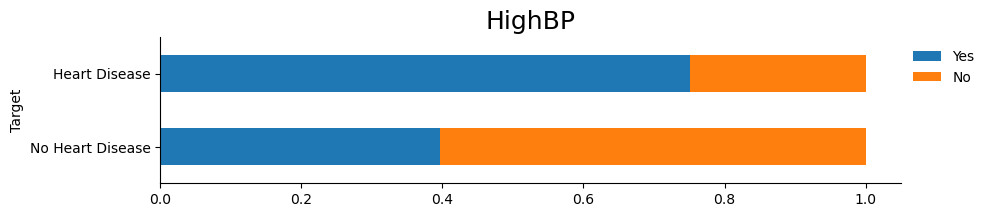

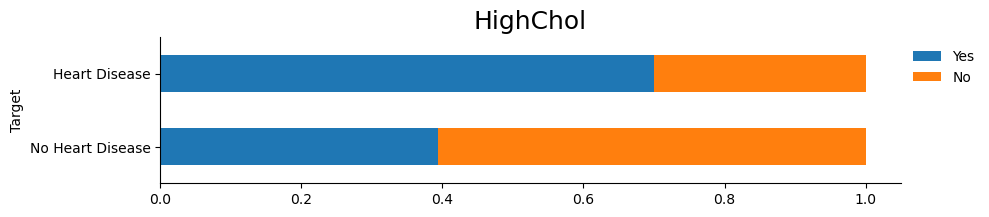

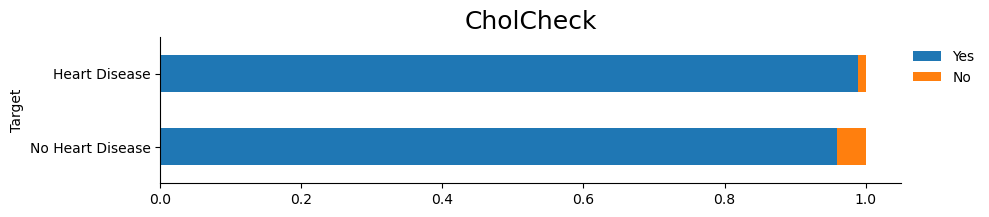

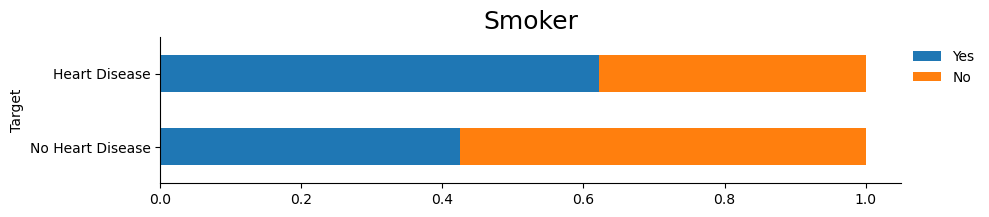

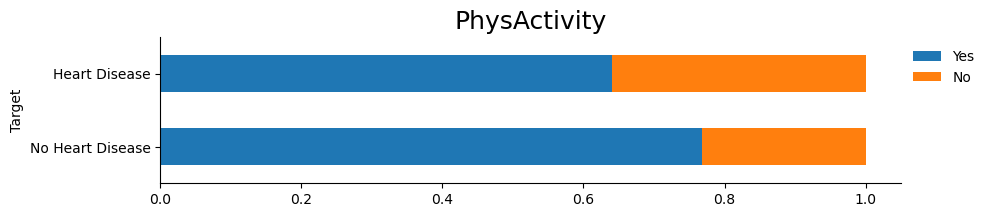

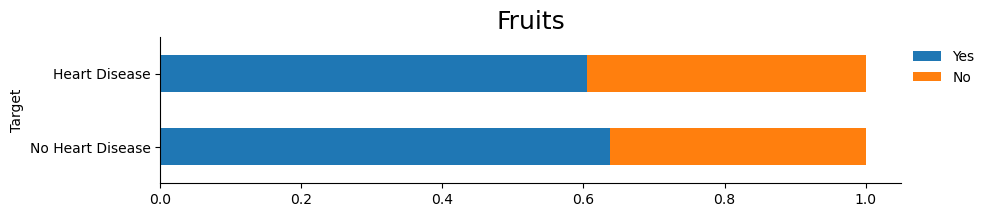

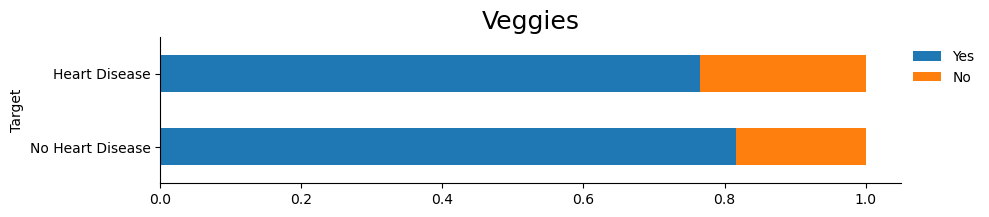

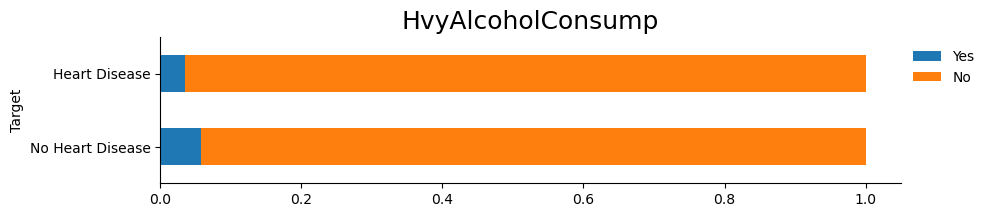

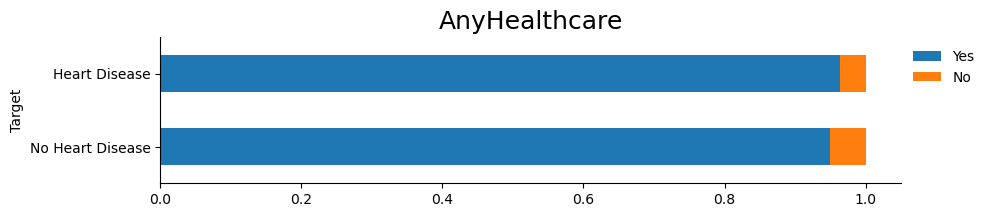

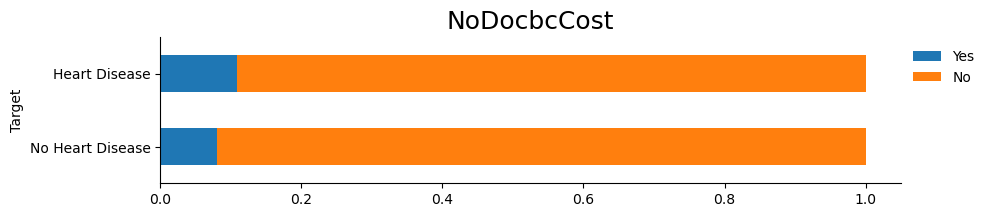

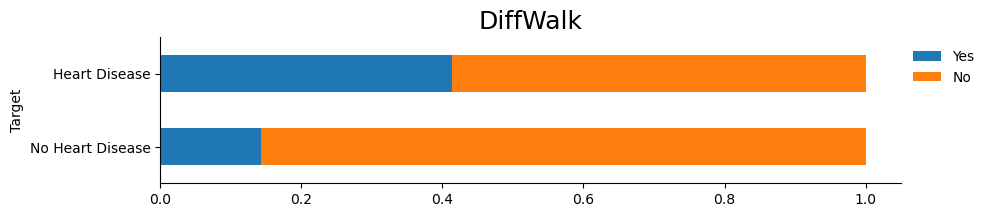

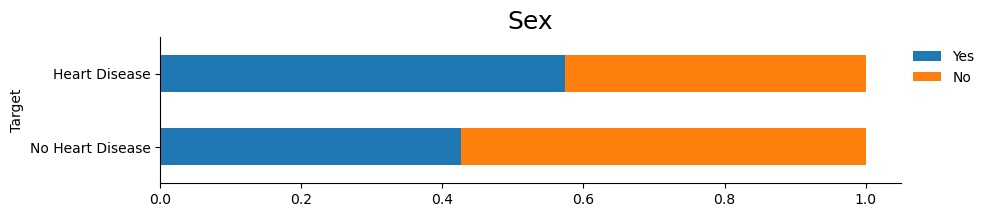

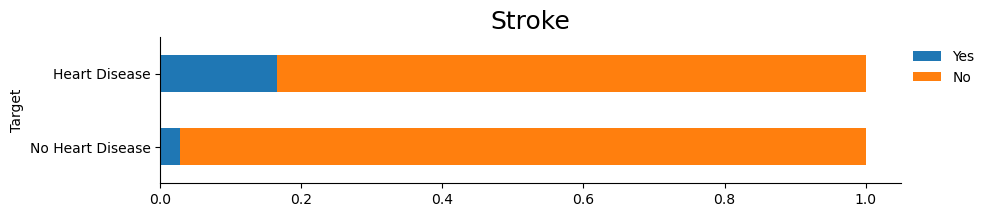

In [ ]:
for var in binary_cols:
    analyse_cat(var)

BP, Cholestrol, Smoking, Diffficulty Walking, stroke, and sex(to some extent) seem to be related to the person having heart disease

In [ ]:
df[ordinal_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,202944.0,28.381214,6.616742,12.0,24.0,27.0,31.0,98.0
Diabetes,202944.0,0.296900,0.698212,0.0,0.0,0.0,0.0,2.0
GenHlth,202944.0,2.512476,1.068334,1.0,2.0,2.0,3.0,5.0
MentHlth,202944.0,3.189343,7.420099,0.0,0.0,0.0,2.0,30.0
PhysHlth,202944.0,4.247246,8.718306,0.0,0.0,0.0,3.0,30.0
Age,202944.0,8.033438,3.058457,1.0,6.0,8.0,10.0,13.0
Education,202944.0,5.049718,0.985920,1.0,4.0,5.0,6.0,6.0
Income,202944.0,6.051413,2.070680,1.0,5.0,7.0,8.0,8.0
BMI_bins,202944.0,3.049462,0.815507,1.0,2.0,3.0,4.0,4.0


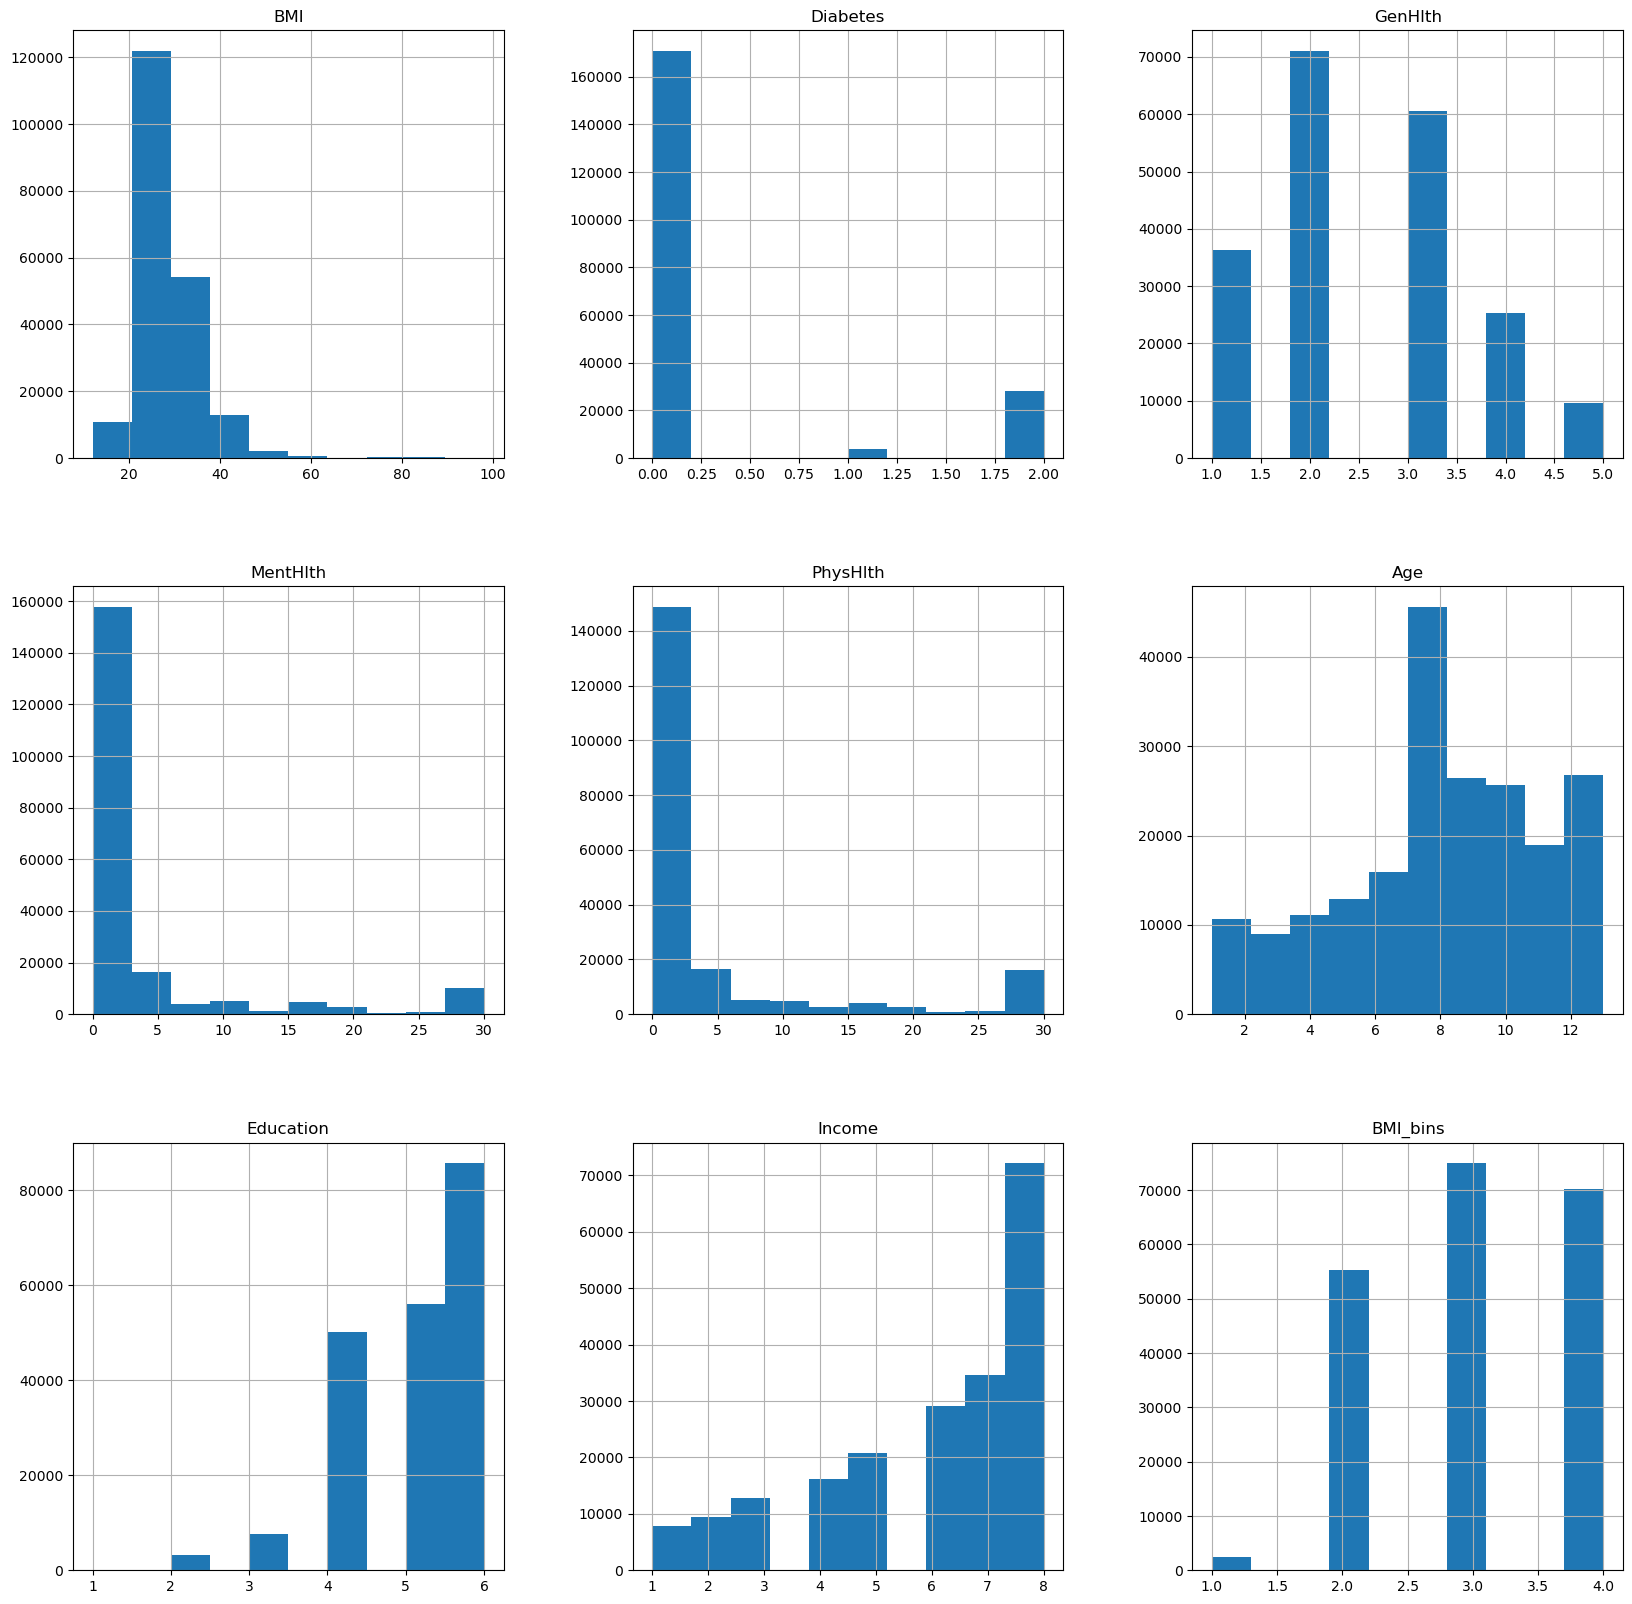

In [ ]:
df[ordinal_cols].hist(figsize = (20, 20))
plt.show()

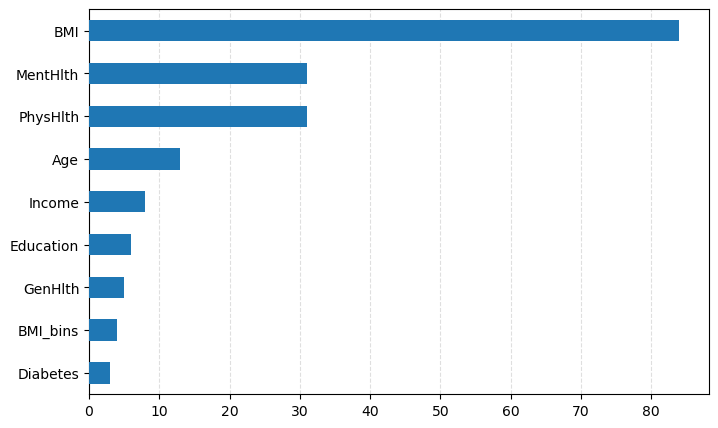

In [ ]:
### Number of unique values


(df[ordinal_cols]
 .nunique()
 .sort_values(ascending = True)
 .plot(kind = 'barh', figsize = (8, 5), zorder = 3))

plt.grid(axis = 'x', linestyle = '--', alpha = 0.4)

BMI seems to be more of a continuous variable while mental health and physical health seem to be related to days of the month

### Correlation

<Axes: >

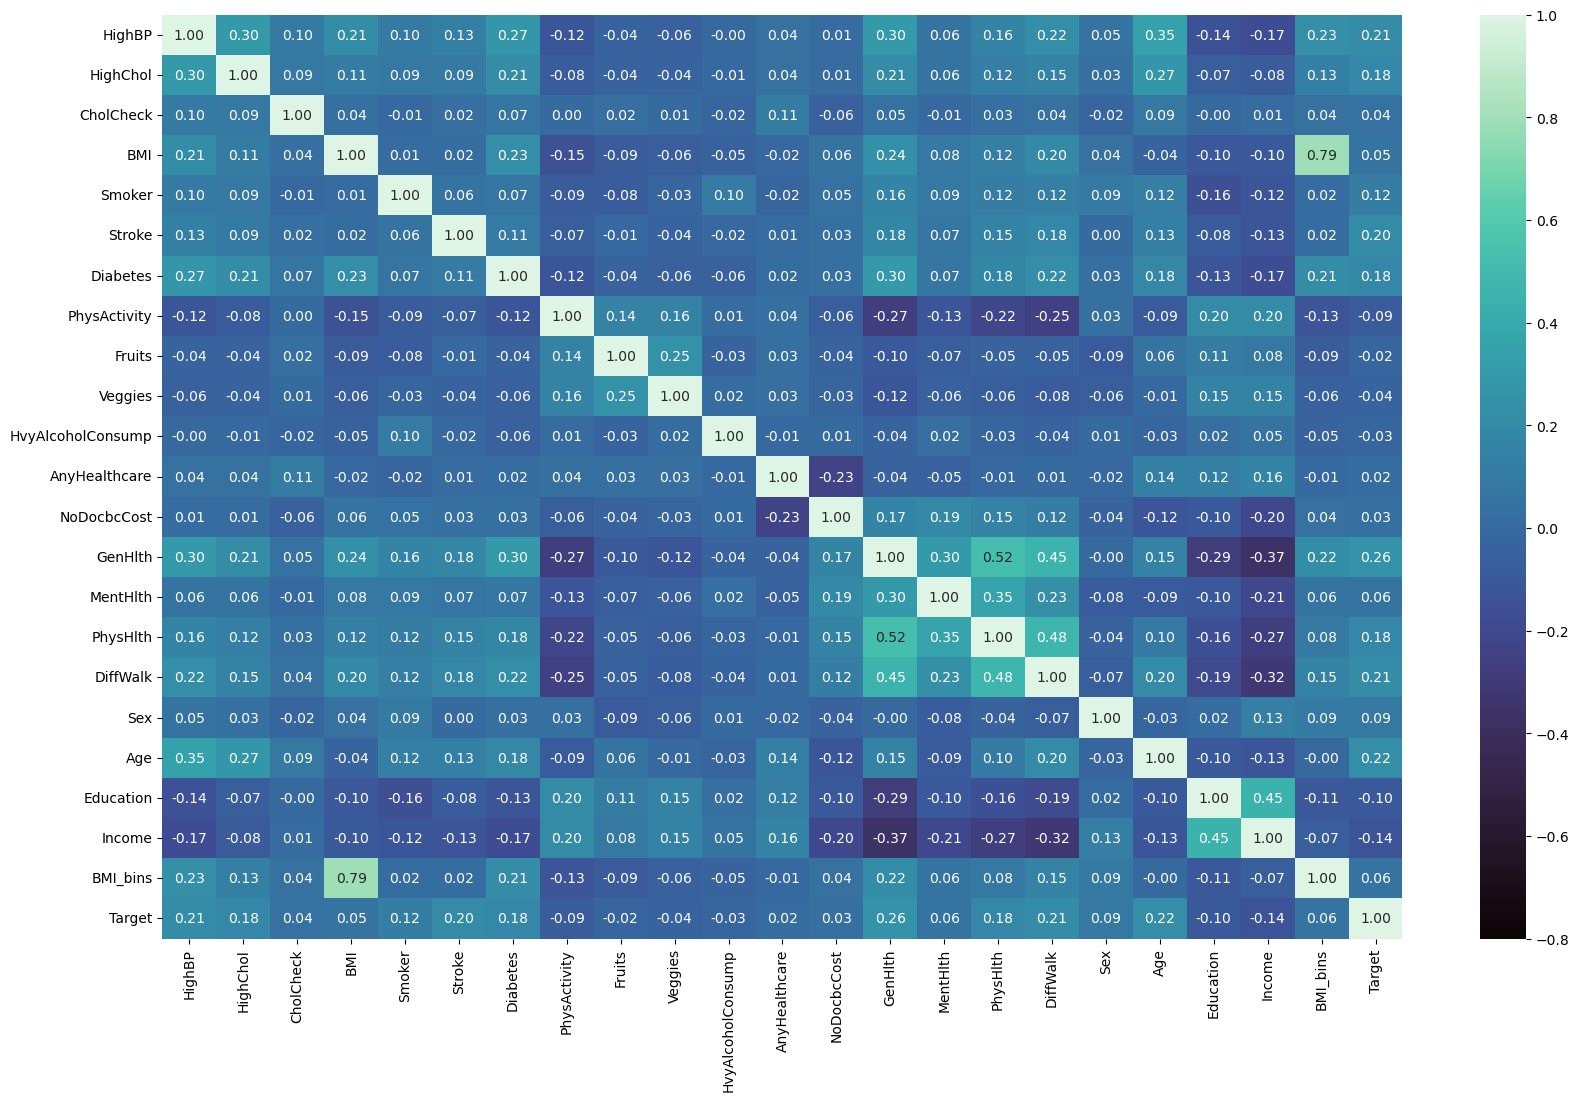

In [ ]:
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), cmap = 'mako', fmt = '.2f', annot = True, vmin = -0.8)

Physical and General health are positively correlated (r = 0.52) \
Income and General health are negatively correlated (r = -0.37)

### Correlations with target variable

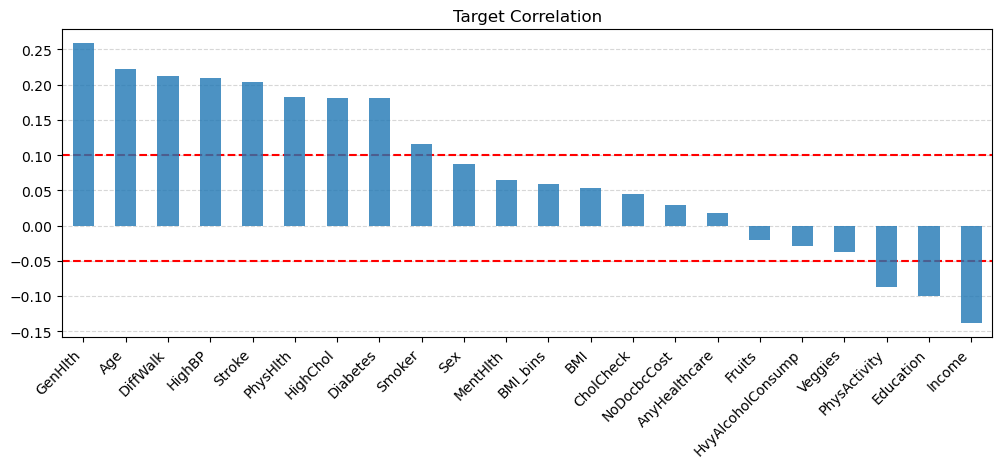

In [ ]:
(df.drop('Target', axis = 1)
.corrwith(df.Target)
.sort_values(ascending  = False)
.plot(kind = 'bar', figsize = (12, 4), title = 'Target Correlation', alpha = 0.8, zorder = 3))

plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0.1, color = 'red', linestyle = '--')
plt.axhline(y = -0.05, color = 'red', linestyle = '--')
plt.show()

**Correlated Variables**: 
- GenHlth 
- Age 
- DiffWalk 
- High BP 
- Stroke
- PhysHlth
- HighChol
- Diabetes
- Smoker
- PhysActivity
- Education
- Income 

**Very Weakly Correlated Variables**: 
- Sex
- MentHlth
- BMI_bins
- BMI
- CholCheck
- NoDobcCost
- AnyHealthcare
- Fruits
- HvyAlcoholConsump
- Veggies

#### GenHlth

1 = Excellent and 5 = Poor

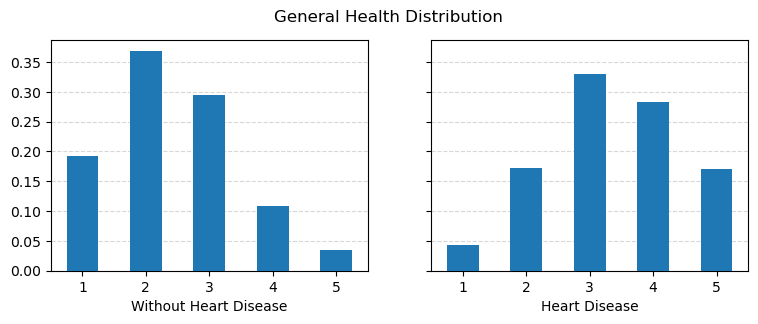

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('General Health Distribution')

(df[df['Target'] == 0]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)


Individuals with heart disease perceived a significantly lower level of well-being compared to those without heart disease

#### HighBP

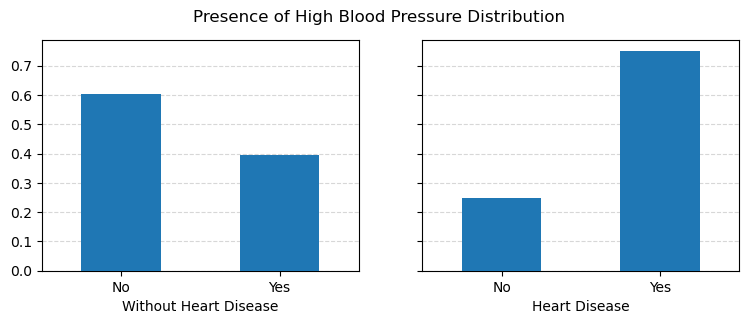

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('Presence of High Blood Pressure Distribution')

(df[df['Target'] == 0]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Individuals without heart disease had a lower incidence of high blood pressure compared to indivdiuals with heart disease

#### DiffWalk

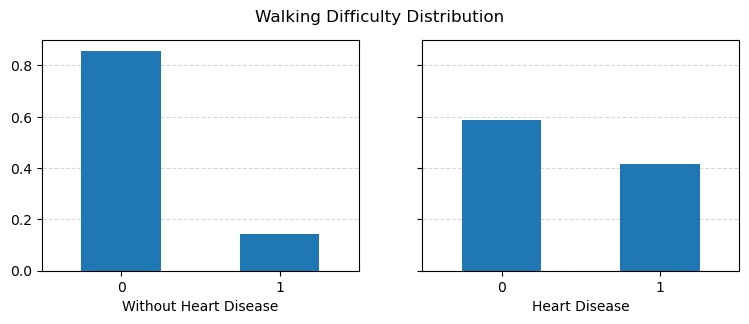

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('Walking Difficulty Distribution')

(df[df['Target'] == 0]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Individuals without heart disease had a lower chance of having difficulties walking than patients with heart disease

#### BMI

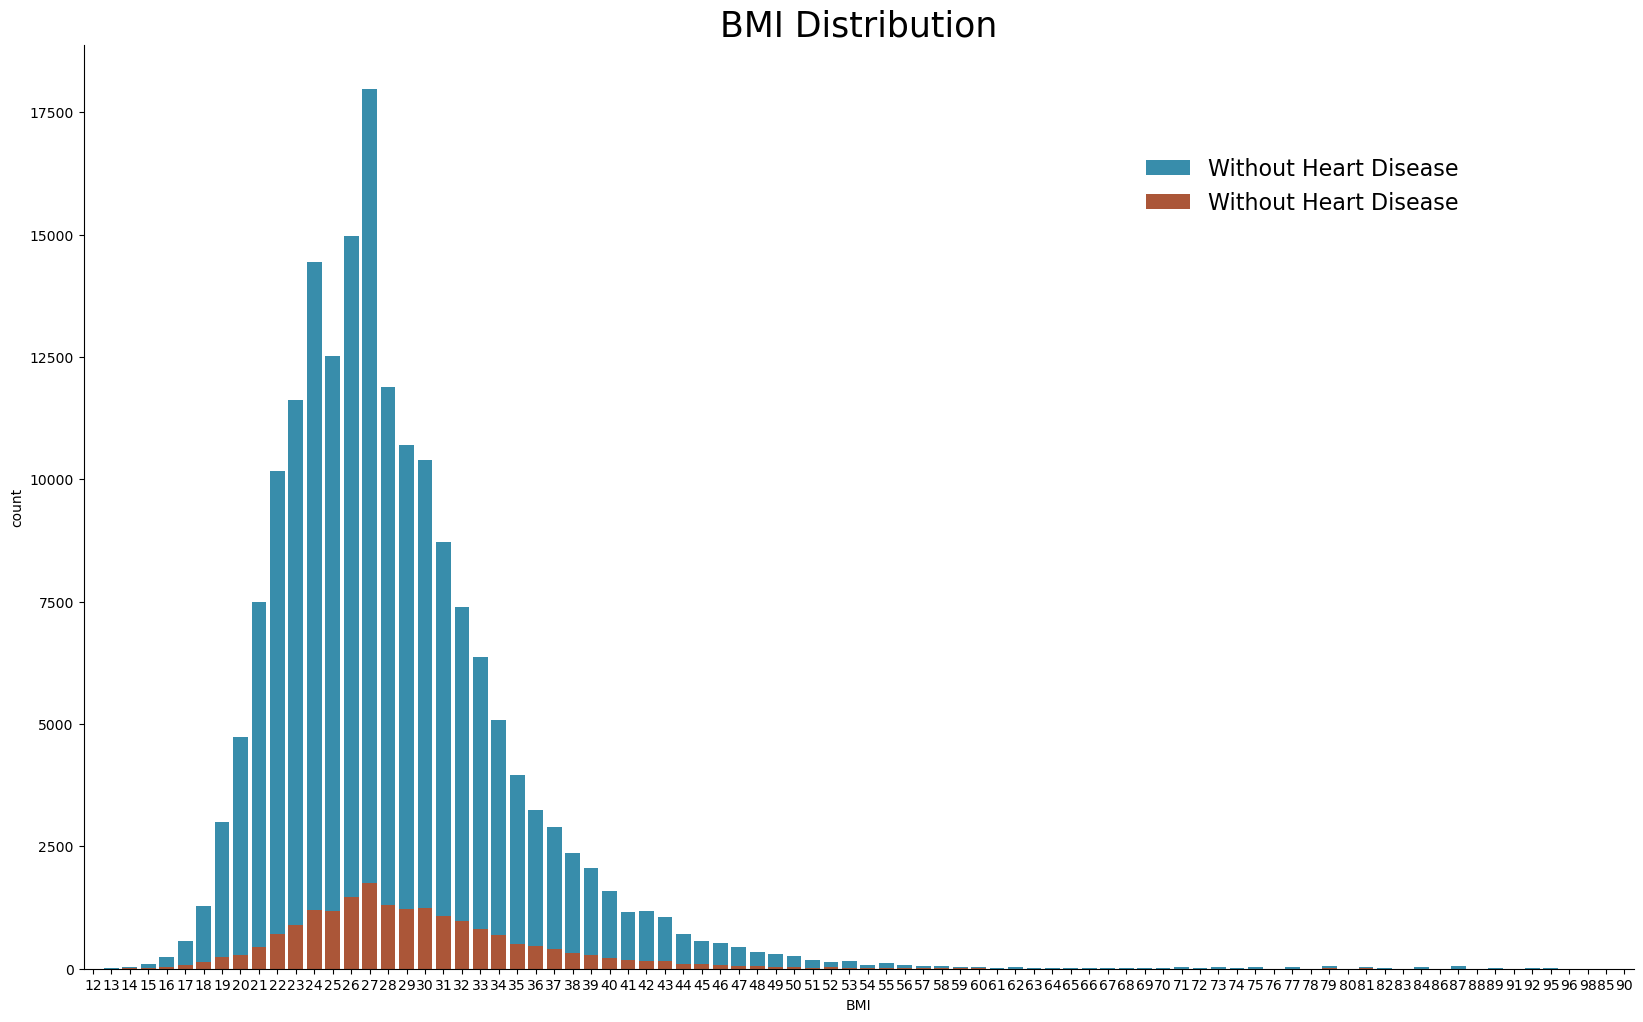

In [ ]:
plt.figure(figsize = (20, 12))

colors = ['#be4d25','#2596be']
sns.countplot(x = (df[df['Target'] == 0]['BMI']), color = colors[1], label = 'Without Heart Disease')
sns.countplot(x = (df[df['Target'] == 1]['BMI']), color = colors[0], label = 'Without Heart Disease')
sns.despine()
plt.title('BMI Distribution', size = 25)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0),shadow=False, frameon=False, prop={'size':16});

#### BMI Bins

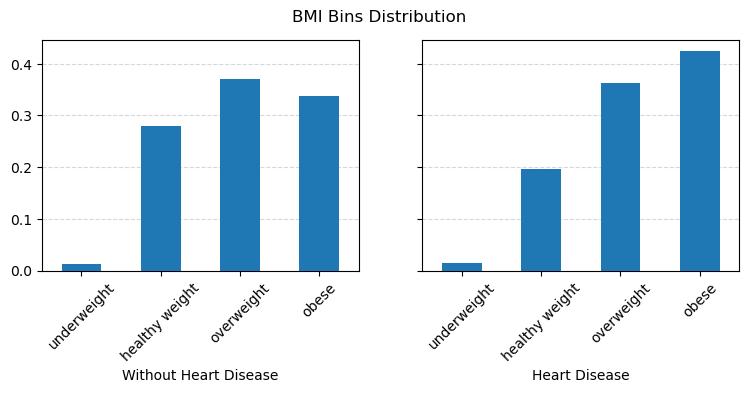

In [ ]:
labels = ['underweight', 'healthy weight', 'overweight', 'obese']

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('BMI Bins Distribution')

(df[df['Target'] == 0]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(labels)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(labels)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Obese people have a higher chance of having heart disease

#### HighChol

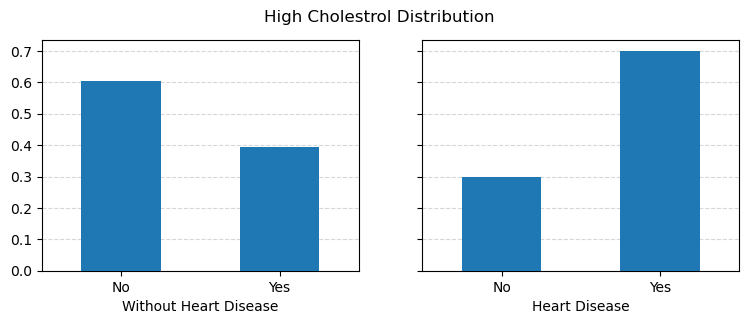

In [ ]:

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('High Cholestrol Distribution')

(df[df['Target'] == 0]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Having high cholestrol significantly increases the chances of having heart disease

#### Age

- 1 = 18-24 years old
- 2 = 25-29 years old
- 3 = 30-34 years old
- 4 = 35-39 years old
- 5 = 40-44 years old
- 6 = 45-49 years old
- 7 = 50-54 years old
- 8 = 55-59 years old
- 9 = 60-64 years old
- 10 = 65-69 years old
- 11 = 70-74 years old
- 12 = 75-79 years old
- 13 = 80 years and older

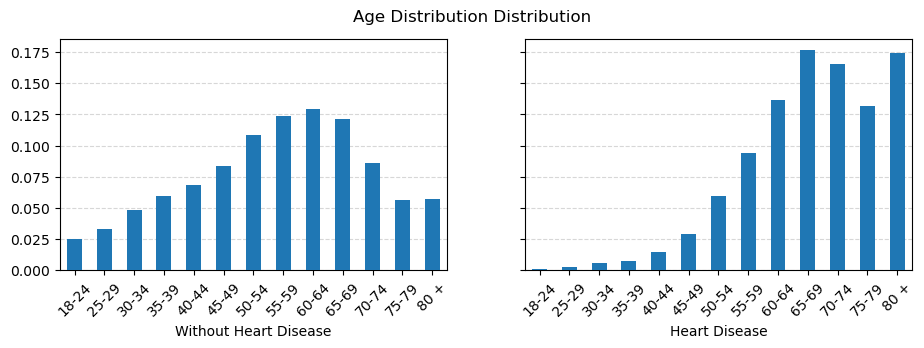

In [ ]:
age_groups = ['18-24', '25-29', '30-34', 
              '35-39', '40-44', '45-49', '50-54', 
              '55-59', '60-64', '65-69', '70-74', 
              '75-79', '80 +']

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (11, 3), sharey = True)
fig.suptitle('Age Distribution Distribution')

(df[df['Target'] == 0]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(age_groups)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(age_groups)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

People of higher ages have a higher chance of having heart disease

#### Diabetes

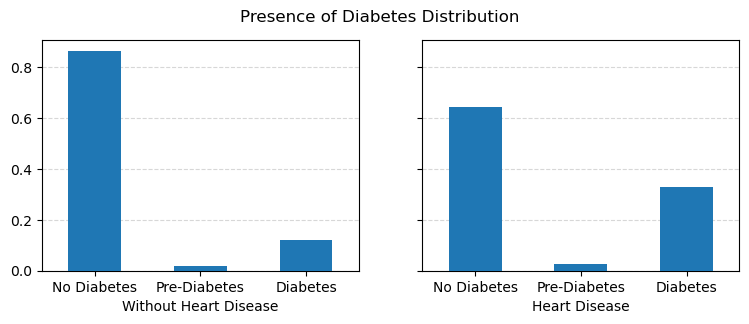

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (9, 3), sharey = True)
fig.suptitle('Presence of Diabetes Distribution')

(df[df['Target'] == 0]['Diabetes']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No Diabetes", 'Pre-Diabetes', 'Diabetes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Diabetes']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No Diabetes", 'Pre-Diabetes', 'Diabetes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Having diabetes increases the chances of having heart disease

#### PhysHlth

Lower = Better Physical Health

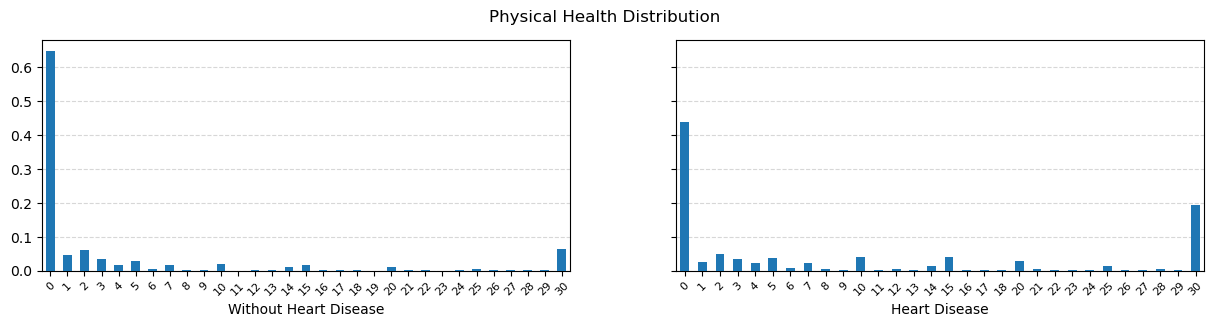

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Physical Health Distribution')

(df[df['Target'] == 0]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

People with heart disease exhibit illnesses on more number of days than people without heart disease

#### Income

- 1 = <10,000
- 2 = 10,000–15,000
- 3 = 15,000–20,000
- 4 = 20,000–25,000
- 5 = 25,000–35,000
- 6 = 35,000–50,000
- 7 = 50,001–75,000
- 8 = >75,000

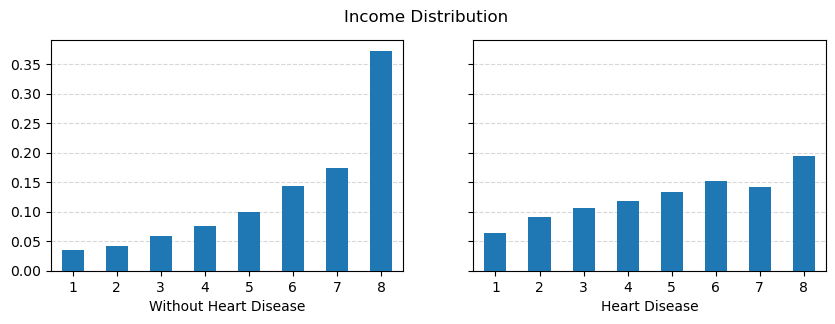

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (10, 3), sharey = True)
fig.suptitle('Income Distribution')

(df[df['Target'] == 0]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

People with heart disease have a stronger presence in lower income tiers than people with heart disease

#### Education

- 1 = Never attended school or only kindergarten
- 2 = Grades 1 through 8 (Elementary)
- 3 = Grades 9 through 11 (Some high school)
- 4 = Grade 12 or GED (High school graduate)
- 5 = College 1 year to 3 years (Some college or technical school)
- 6 = College 4 years or more (College graduate)

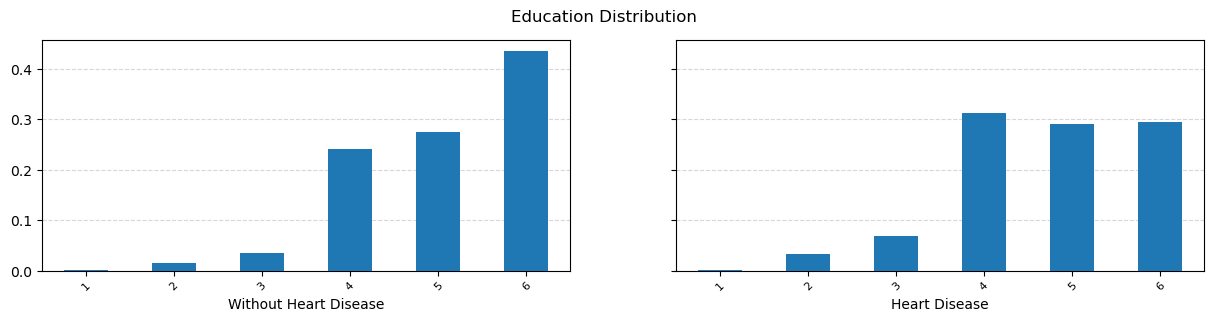

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Education Distribution')

(df[df['Target'] == 0]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Fewer individuals with college degrees get diagnosed with heart diseases

#### PhysActivity

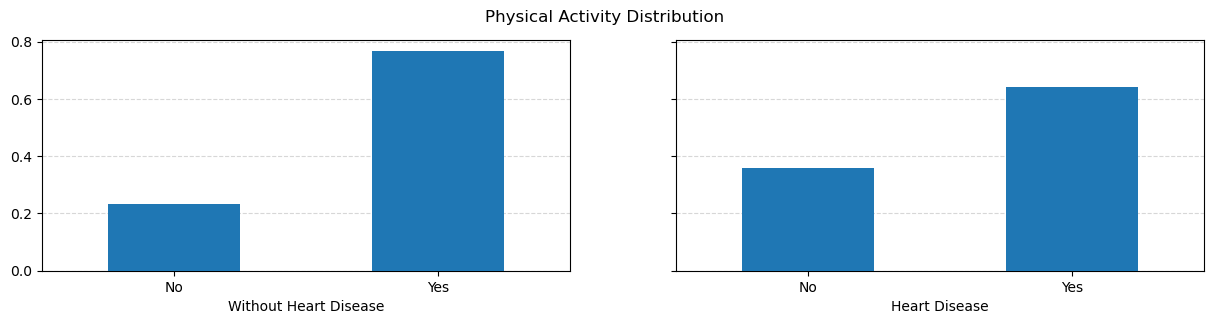

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Physical Activity Distribution')

(df[df['Target'] == 0]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

There are more individuals diagnosed with heart disease who report lower levels of physical activity

#### Smoker

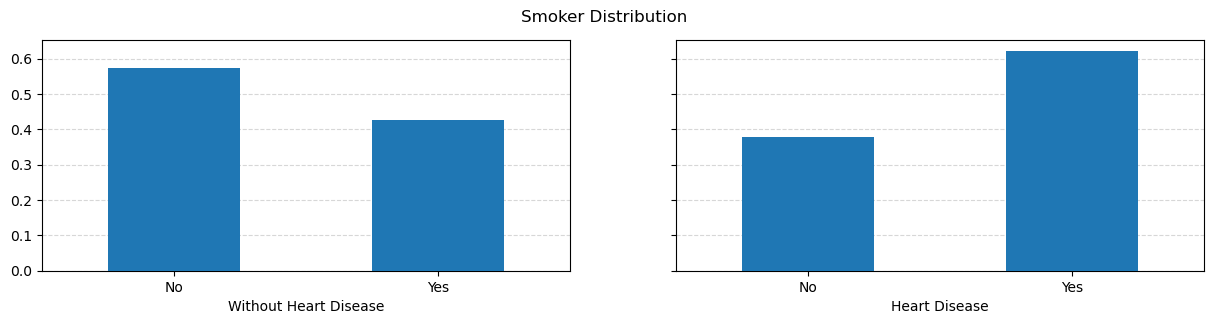

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Smoker Distribution')

(df[df['Target'] == 0]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

More people with heart disease are smokers

#### Stroke

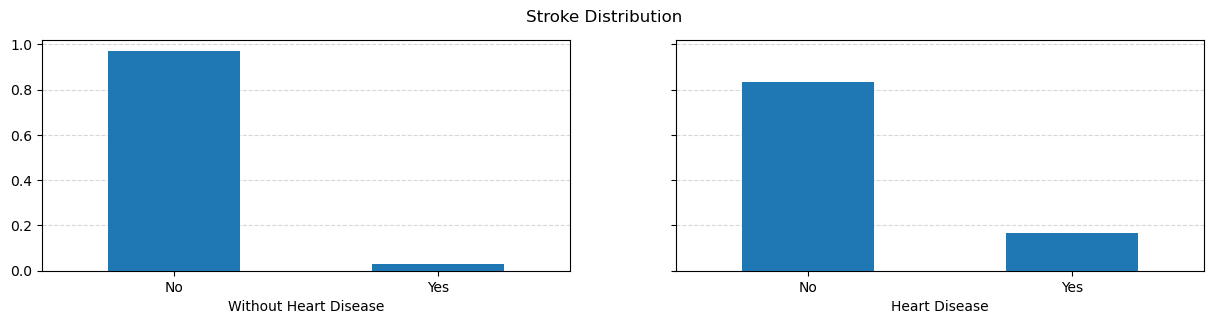

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Stroke Distribution')

(df[df['Target'] == 0]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

Not a very strong association but slightly higher number of people with heart disease had a stroke 

#### Alcohol Consumption

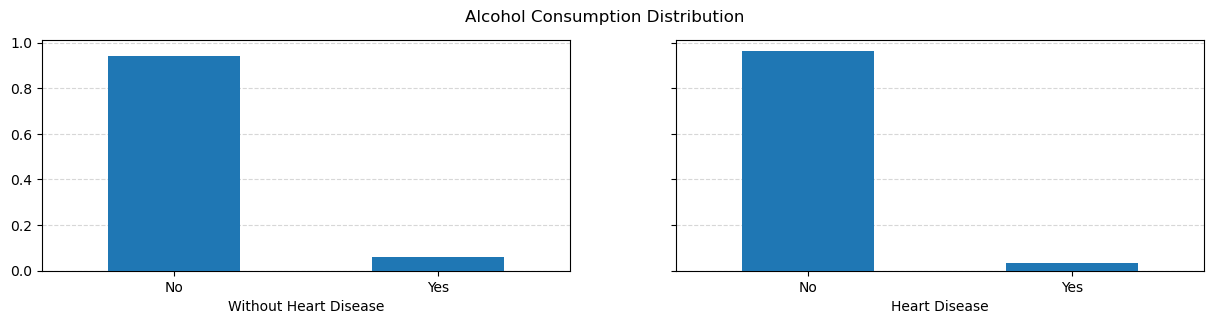

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Alcohol Consumption Distribution')

(df[df['Target'] == 0]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

No strong association observed

#### Cholestrol Check

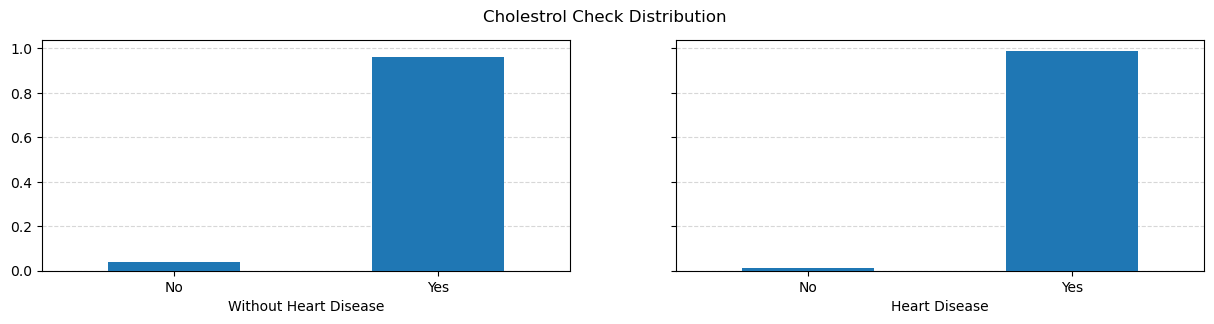

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 3), sharey = True)
fig.suptitle('Cholestrol Check Distribution')

(df[df['Target'] == 0]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax, kind = 'bar', zorder = 3))
ax.set_xlabel('Without Heart Disease')
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

(df[df['Target'] == 1]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax = ax2, kind = 'bar', zorder = 3))
ax2.set_xlabel('Heart Disease')
ax2.set_xticklabels(["No", 'Yes'])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.5)

No strong association observed

## Feature Selection

#### Pearson Correlation

In [ ]:
pear = (df.drop('Target', axis = 1)
        .corrwith(df.Target)
        .abs()
        .sort_values(ascending = False))
pear

GenHlth              0.258555
Age                  0.222372
DiffWalk             0.212209
HighBP               0.209105
Stroke               0.203323
PhysHlth             0.183156
HighChol             0.181041
Diabetes             0.180490
Income               0.138833
Smoker               0.115821
Education            0.100396
Sex                  0.086893
PhysActivity         0.086775
MentHlth             0.064442
BMI_bins             0.059176
BMI                  0.052964
CholCheck            0.044732
Veggies              0.037913
NoDocbcCost          0.029857
HvyAlcoholConsump    0.028675
Fruits               0.019900
AnyHealthcare        0.018156
dtype: float64

In [ ]:
pear[pear>0.05]

GenHlth         0.258555
Age             0.222372
DiffWalk        0.212209
HighBP          0.209105
Stroke          0.203323
PhysHlth        0.183156
HighChol        0.181041
Diabetes        0.180490
Income          0.138833
Smoker          0.115821
Education       0.100396
Sex             0.086893
PhysActivity    0.086775
MentHlth        0.064442
BMI_bins        0.059176
BMI             0.052964
dtype: float64

#### Chi2 Test

In [ ]:
df_X = df.drop('Target', axis = 1)
df_y = df['Target']

In [ ]:
chi = chi2(df_X, df_y)
chisquare_df = pd.DataFrame(chi).T.set_index(df_X.columns).rename(columns = {0: 'Chi2 Score', 1: 'p-value'})
chi2_list = chisquare_df.sort_values(by = 'Chi2 Score', ascending = False)
chi2_list

,Chi2 Score,p-value
PhysHlth,121834.702830,0.000000e+00
MentHlth,14548.769404,0.000000e+00
Age,11685.231985,0.000000e+00
Diabetes,10855.424192,0.000000e+00
Stroke,8044.988721,0.000000e+00
DiffWalk,7603.480837,0.000000e+00
GenHlth,6162.979880,0.000000e+00
HighBP,5059.942966,0.000000e+00
HighChol,3837.021131,0.000000e+00
Income,2771.576723,0.000000e+00


#### Mutual Information

In [ ]:
mut_info = mutual_info_classif(df_X, df_y)
mut_df = pd.DataFrame(mut_info, columns = ['Mutual Info'], index = df_X.columns)
mut_df.sort_values(by = 'Mutual Info', ascending = False)

,Mutual Info
AnyHealthcare,0.044300
CholCheck,0.042145
PhysActivity,0.041255
GenHlth,0.039949
HighBP,0.039905
Fruits,0.035157
Veggies,0.034597
HighChol,0.034542
Age,0.031675
Smoker,0.027179


In [ ]:
chi2_list[chi2_list['Chi2 Score'] > 250].index.to_list()

['PhysHlth',
 'MentHlth',
 'Age',
 'Diabetes',
 'Stroke',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'HighChol',
 'Income',
 'Smoker',
 'BMI',
 'Sex',
 'Education',
 'PhysActivity']

## Preprocessing

In [ ]:
df2 = pd.concat([X_test, y_test], axis = 1)

In [ ]:
def drop_duplicates_reset_index(df):
    dataframe = df.copy()
    dataframe = dataframe.drop_duplicates().reset_index(drop = True)
    return dataframe

selected_cols = ['PhysHlth','MentHlth','Age',
 'Diabetes','Stroke','DiffWalk','GenHlth',
 'HighBP','HighChol','Income','Smoker',
 'BMI','Sex','Education','PhysActivity']


df_clean = drop_duplicates_reset_index(df)
df2_clean = drop_duplicates_reset_index(df2)

X_train = df_clean[selected_cols]
y_train = df_clean['Target']

X_test = df2_clean[selected_cols]
y_test = df2_clean['Target']


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## Model Preparation

#### Without Balancing

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
xgb_clf = XGBClassifier()
knn_clf = KNeighborsClassifier()
gauss_nb_clf = GaussianNB()
log_clf = LogisticRegression()

In [ ]:
def classifiers_test(clf_names, clf_list, X_tr, X_test, y_tr, y_test):
    
    info_clf = []
    for count, clf in enumerate(clf_list):
        clf.fit(X_tr, y_tr)

        y_pred = clf.predict(X_tr)
        y_pred_proba = clf.predict_proba(X_tr)[:, 1]
        acc_score_train = accuracy_score(y_tr, y_pred)
        auc_score_train = roc_auc_score(y_tr, y_pred_proba)
        f1_score_train = f1_score(y_tr, y_pred)
        recall_train = recall_score(y_tr, y_pred)

        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        acc_score_test = accuracy_score(y_test, y_pred)
        auc_score_test = roc_auc_score(y_test, y_pred_proba)
        f1_score_test = f1_score(y_test, y_pred)
        recall_test = recall_score(y_test, y_pred)

        info_clf.append([clf_names[count], acc_score_train, auc_score_train, f1_score_train, recall_train, acc_score_test, auc_score_test, f1_score_test, recall_test])
    info_df = pd.DataFrame(info_clf, columns = ['Model', 'Train Accuracy', 'Train AUC', 'Train F1', 'Train Recall', 'Test Accuracy', 'Test AUC', 'Test F1', 'Test Recall'])

    return info_df

In [ ]:
clf_names = ['RandomForest', 'DecisionTree', 'XGBoost', 'KNeighbors', 'GaussianNB', 'LogisticRegression']
clf_list = [forest, tree, xgb_clf, knn_clf, gauss_nb_clf, log_clf]

In [ ]:
imbalanced_res = classifiers_test(clf_names, clf_list, X_train_scaled, X_test_scaled, y_train, y_test)
imbalanced_res

,Model,Train Accuracy,Train AUC,Train F1,Test Accuracy,Test AUC,Test F1
0,RandomForest,0.992481,0.998728,0.958875,0.900288,0.806853,0.184690
1,DecisionTree,0.992495,0.999581,0.958633,0.855625,0.594820,0.257476
2,XGBoost,0.913828,0.874649,0.254243,0.906674,0.843378,0.171479
3,KNeighbors,0.919613,0.927726,0.402899,0.897272,0.724217,0.226247
4,GaussianNB,0.833309,0.816241,0.361825,0.834851,0.817070,0.363830
5,LogisticRegression,0.907822,0.846950,0.207633,0.907088,0.845058,0.193085
6,GradientBoosting,0.908591,0.851775,0.193400,0.908034,0.848060,0.180829


#### Balancing with Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus= rus.fit_resample(X_train_scaled, y_train)

undersample_res = classifiers_test(clf_names, clf_list, X_train_rus, X_test_scaled, y_train_rus, y_test)
undersample_res

,Model,Train Accuracy,Train AUC,Train F1,Test Accuracy,Test AUC,Test F1
0,RandomForest,0.992257,0.999669,0.992255,0.728891,0.822857,0.352371
1,DecisionTree,0.992257,0.999877,0.992211,0.687382,0.677402,0.284929
2,XGBoost,0.813514,0.898727,0.819450,0.737228,0.837516,0.361617
3,KNeighbors,0.813592,0.900890,0.817768,0.718898,0.792960,0.336034
4,GaussianNB,0.720074,0.816036,0.698759,0.779052,0.817465,0.355006
5,LogisticRegression,0.770639,0.847264,0.775628,0.755026,0.845343,0.378021
6,GradientBoosting,0.775531,0.854001,0.784608,0.742274,0.847686,0.371467


#### Balancing with Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

oversample_res = classifiers_test(clf_names, clf_list, X_train_ros, X_test_scaled, y_train_ros, y_test)
oversample_res

,Model,Train Accuracy,Train AUC,Train F1,Test Accuracy,Test AUC,Test F1
0,RandomForest,0.991299,0.999588,0.991354,0.881544,0.801246,0.269567
1,DecisionTree,0.991299,0.999606,0.991351,0.851328,0.581168,0.239847
2,XGBoost,0.801069,0.880847,0.810082,0.753587,0.839389,0.371317
3,KNeighbors,0.924577,0.990819,0.928357,0.799354,0.716773,0.327787
4,GaussianNB,0.719736,0.815891,0.698077,0.779052,0.817148,0.354783
5,LogisticRegression,0.770250,0.846830,0.775378,0.754218,0.845319,0.377496
6,GradientBoosting,0.774593,0.851785,0.783891,0.741998,0.848118,0.371519


#### Balancing with SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smot = SMOTE()
X_train_smot, y_train_smot = smot.fit_resample(X_train_scaled, y_train)



In [ ]:
smot_res = classifiers_test(clf_names, clf_list, X_train_smot, X_test_scaled, y_train_smot, y_test)

In [ ]:
smot_res

,Model,Train Accuracy,Train AUC,Train F1,Train Recall,Test Accuracy,Test AUC,Test F1,Test Recall
0,RandomForest,0.995441,0.999781,0.995438,0.994582,0.888462,0.809649,0.285028,0.236033
1,DecisionTree,0.995447,0.999950,0.995434,0.992667,0.851644,0.592841,0.252755,0.266374
2,XGBoost,0.944922,0.984310,0.942471,0.902317,0.905018,0.839588,0.208053,0.132454
3,KNeighbors,0.916058,0.987817,0.920982,0.978371,0.782758,0.739505,0.328664,0.564553
4,GaussianNB,0.726783,0.821528,0.707582,0.661122,0.781201,0.820308,0.359915,0.653065
5,LogisticRegression,0.775456,0.851686,0.781299,0.802176,0.755401,0.844527,0.376758,0.784892


#### Model Training Results:
After exploring the performance of all models in undersampling and oversampling methods, the best performance was seen for Logistic Regression using SMOTE

In [ ]:
best_feature_list = chi2_list.index.to_list()
best_feature_list.remove('BMI_bins')
best_feature_list

['PhysHlth',
 'MentHlth',
 'Age',
 'Diabetes',
 'Stroke',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'HighChol',
 'Income',
 'Smoker',
 'BMI',
 'Sex',
 'Education',
 'PhysActivity',
 'NoDocbcCost',
 'HvyAlcoholConsump',
 'Veggies',
 'Fruits',
 'CholCheck',
 'AnyHealthcare']

In [ ]:
X_train_smot, X_val_smot, y_train_smot, y_val_smot = train_test_split(X_train_smot, y_train_smot, stratify = y_train_smot, test_size = 0.2)

In [ ]:
from sklearn.feature_selection import RFE


rfe_auc_list = []


for k in range(1, 22):
    RFE_selector = RFE(estimator = log_clf, n_features_to_select = k, step = 1)
    RFE_selector.fit(X_train_smot, y_train_smot)
    sel_x_t = RFE_selector.transform(X_train_smot)
    sel_x_val = RFE_selector.transform(X_val_smot)

    log_clf.fit(sel_x_t, y_train_smot)
    log_clf_preds_proba = log_clf.predict_proba(sel_x_val)[:, 1]
    log_clf_preds = log_clf.predict(sel_x_val)

    log_clf_recall = round(recall_score(y_val_smot, log_clf_preds), 4)
    log_clf_f1 = round(f1_score(y_val_smot, log_clf_preds), 4)

    rfe_auc_list.append([log_clf_recall, log_clf_f1])

In [ ]:
pd.DataFrame(rfe_auc_list, columns = ['Recall', 'F1 Score'])

,Recall,F1 Score
0,0.7107,0.6996
1,0.7766,0.7499
2,0.7656,0.7550
3,0.7764,0.7650
4,0.7952,0.7750
5,0.8025,0.7774
6,0.8006,0.7797
7,0.8033,0.7811
8,0.8045,0.7822
9,0.8051,0.7828


In [ ]:
RFE_selector = RFE(estimator = log_clf, n_features_to_select = 15, step = 6)
RFE_selector.fit(X_train_smot, y_train_smot)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train_smot.columns[selected_features_mask]
selected_features

Index(['PhysHlth', 'MentHlth', 'Age', 'Diabetes', 'Stroke', 'DiffWalk',
       'GenHlth', 'HighBP', 'HighChol', 'Income', 'Smoker', 'BMI', 'Sex',
       'Education', 'PhysActivity'],
      dtype='object')

RFE Feature Selection matches with the feature selection done using filter methods (Chi2 Score and Pearson Correlation)

In [ ]:
selected_cols

['PhysHlth',
 'MentHlth',
 'Age',
 'Diabetes',
 'Stroke',
 'DiffWalk',
 'GenHlth',
 'HighBP',
 'HighChol',
 'Income',
 'Smoker',
 'BMI',
 'Sex',
 'Education',
 'PhysActivity']

### Hyperparameter Tuning

In [ ]:
X_train_smot, y_train_smot = smot.fit_resample(X_train_scaled, y_train)


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [50, 100, 200, 500],
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(
    estimator = log_reg,
    param_grid = param_grid,
    scoring = 'recall',
    cv = 4, 
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_smot, y_train_smot)

print("Best parameters:", grid_search.best_params_)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Best parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
log_tuned = LogisticRegression(**grid_search.best_params_)

cross_val_score(log_tuned, X_train_smot, y_train_smot, scoring = 'recall', cv = 10, n_jobs = -1)

array([0.78825858, 0.7985728 , 0.80235068, 0.80751934, 0.80560053,
       0.79684596, 0.79773327, 0.79863277, 0.7989326 , 0.80121132])

In [ ]:
log_tuned.fit(X_train_smot, y_train_smot)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

TEST SET RESULTS:
Recall Score: 0.7836024323757601
F1 Score: 0.37927534760986503
Accuracy: 0.7488347261863206
AUC ROC: 0.8394468222272332
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     43932
           1       0.25      0.78      0.38      4769

    accuracy                           0.75     48701
   macro avg       0.61      0.76      0.61     48701
weighted avg       0.90      0.75      0.80     48701



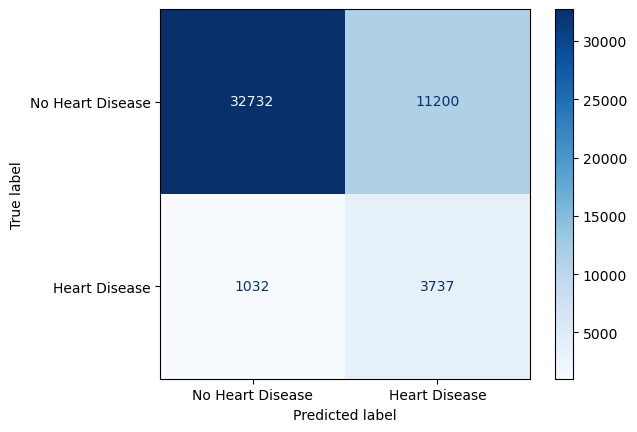

In [ ]:
y_preds = log_tuned.predict(X_test_scaled)
y_preds_proba = log_tuned.predict_proba(X_test_scaled)[:, 1]

print('TEST SET RESULTS:')
print('Recall Score:', recall_score(y_test, y_preds))
print('F1 Score:', f1_score(y_test, y_preds))
print('Accuracy:', accuracy_score(y_test, y_preds))
print('AUC ROC:', roc_auc_score(y_test, y_preds_proba))
print(classification_report(y_test, y_preds))
cf = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(cf, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap = 'Blues')
plt.show()

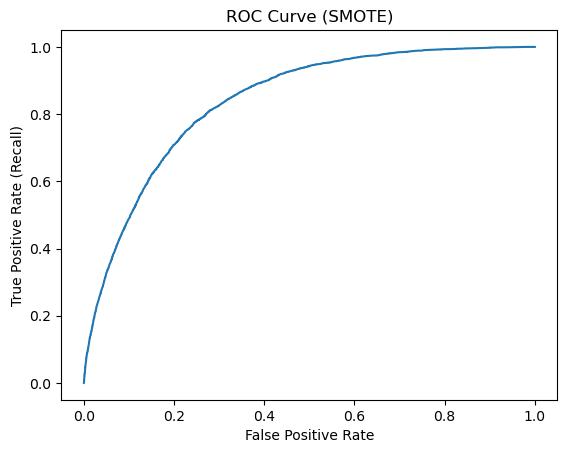

In [ ]:
y_probs = log_tuned.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (SMOTE)')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(log_tuned, "LogisticRegressionModel")

['LogisticRegressionModel']

In [ ]:
joblib.dump(scaler, "Scaler_")

['Scaler_']

In [ ]:
from sklearn.pipeline import Pipeline

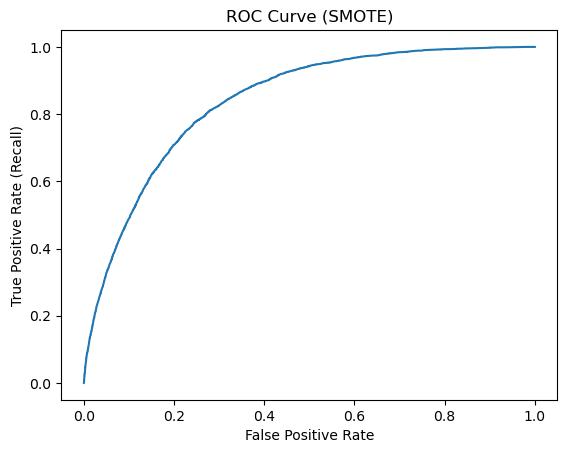

In [112]:
y_probs = log_tuned.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (SMOTE)')
plt.show()

In [51]:
import joblib

In [118]:
joblib.dump(log_tuned, "LogisticRegressionModel")

['LogisticRegressionModel']

In [52]:
joblib.dump(scaler, "Scaler_")

['Scaler_']

In [2]:
from sklearn.pipeline import Pipeline